### Начало

In [122]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
df_train = pd.read_csv('train999.csv')
df_test = pd.read_csv('test999.csv')

### Предобработка

Разьединение массивов, замена null на NaN, удаление ненужных столбцов и разделение по станциям


In [124]:
import ast
df_train['keys'] = df_train['keys'].apply(ast.literal_eval).apply(lambda x: x[0])
df_train['values'] = df_train['values'].apply(ast.literal_eval).apply(lambda x: x[0])

#озаменяет null на NaN
df_train['values'] = df_train['values'].apply(lambda x: [np.nan if v == 'null' else float(v) for v in x])

keys = df_train['keys'][0]  
values = df_train['values'].tolist()  


values_df = pd.DataFrame(values, columns=keys)

df_train.drop(columns=['keys', 'values'], inplace=True)
result_df = pd.concat([df_train, values_df], axis=1)

result_df

id  configuration_item_id                   ts          __insert_ts  \
0     1684                  30928  2024-06-29 03:00:01  2024-06-29 06:24:05   
1      862                  30928  2024-06-10 11:00:00  2024-06-10 13:42:48   
2     1992                  24445  2024-05-26 22:00:02  2024-05-26 22:56:03   
3      889                  30928  2024-06-11 01:00:59  2024-06-11 03:56:49   
4     1362                  30928  2024-06-22 02:00:00  2024-06-22 05:25:38   
...    ...                    ...                  ...                  ...   
1935  1638                  30928  2024-06-28 02:30:01  2024-06-28 05:23:15   
1936  1095                  30928  2024-06-15 23:30:01  2024-06-16 02:12:08   
1937  1130                  30928  2024-06-16 18:30:00  2024-06-16 21:08:04   
1938  1294                  30928  2024-06-20 15:30:02  2024-06-20 18:11:05   
1939   860                  30928  2024-06-10 10:00:01  2024-06-10 13:37:50   

      meteo_layer_type  meteo_cloudiness  meteo_wind_velocity  meteo_humidity  \
0                  1.0               3.0                  2.3            46.7   
1                  1.0               2.0                  2.5            29.4   
2                  1.0               2.0                  0.5            70.8   
3                  1.0               3.0                  2.5            61.6   
4                  1.0               4.0                  2.8            61.5   
...                ...               ...                  ...             ...   
1935               1.0               2.0                  2.1            58.7   
1936               1.0               3.0                  0.5            60.7   
1937               1.0               3.0                  1.2            90.1   
1938               1.0               2.0                  0.6            58.6   
1939               NaN               2.0                  2.4            34.5   

      meteo_t_underroad  meteo_freezing_point  meteo_wind_direction  \
0                  41.4                   0.0                 132.0   
1                  32.1                   0.0                 351.0   
2                  21.8                   0.0                 121.0   
3                  25.7                   0.0                  63.0   
4                  27.5                   0.0                 185.0   
...                 ...                   ...                   ...   
1935               39.1                   0.0                  82.0   
1936               27.0                   0.0                 205.0   
1937               26.0                   0.0                 231.0   
1938               22.7                   0.0                 184.0   
1939               34.9                   NaN                 338.0   

      meteo_dew_point  meteo_t_road  meteo_wind_gusts  meteo_t_air  \
0                16.9          35.1               4.2         29.5   
1                 3.3          30.3               4.4         22.0   
2                -4.7          18.6               1.1          0.0   
3                11.2          20.7               4.2         18.7   
4                14.9          22.2               6.0         22.7   
...               ...           ...               ...          ...   
1935             18.6          33.3               4.2         27.4   
1936             15.4          24.0               1.9         23.4   
1937             17.3          26.0               2.4         18.9   
1938              6.2          22.7               1.9         14.2   
1939              5.7          32.0               4.4         22.0   

      meteo_air_pressure  
0                  733.0  
1                  737.0  
2                  754.0  
3                  736.0  
4                  733.0  
...                  ...  
1935               736.0  
1936               736.0  
1937               734.0  
1938               737.0  
1939               737.0  

[1940 rows x 16 columns]

In [125]:
df_test['keys'] = df_test['keys'].apply(ast.literal_eval).apply(lambda x: x[0])
df_test['values'] = df_test['values'].apply(ast.literal_eval).apply(lambda x: x[0])

#озаменяет null на NaN
df_test['values'] = df_test['values'].apply(lambda x: [np.nan if v == 'null' else float(v) for v in x])

keys_test = df_test['keys'][0]  
values_test = df_test['values'].tolist()  


values_df_test = pd.DataFrame(values_test, columns=keys_test)

df_test.drop(columns=['keys', 'values'], inplace=True)
result_df_test = pd.concat([df_test, values_df_test], axis=1)

result_df_test

id  configuration_item_id                   ts          __insert_ts  \
0    1106                  30928  2024-06-16 05:00:00  2024-06-16 08:00:03   
1    1321                  30928  2024-06-21 05:00:01  2024-06-21 07:59:16   
2    2313                  24445  2024-06-11 06:30:01  2024-06-11 07:38:51   
3    2274                  24445  2024-06-10 02:00:01  2024-06-10 03:23:49   
4    1432                  30928  2024-06-23 14:30:00  2024-06-23 17:20:10   
..    ...                    ...                  ...                  ...   
827  1900                  24445  2024-05-21 21:30:00  2024-05-21 22:40:12   
828   647                  30928  2024-06-05 12:00:01  2024-06-05 14:42:41   
829  2438                  24445  2024-06-16 12:30:01  2024-06-16 15:12:29   
830  2452                  24445  2024-06-17 05:30:00  2024-06-17 09:01:05   
831  1628                  30928  2024-06-27 21:00:00  2024-06-28 00:24:27   

     meteo_layer_type  meteo_cloudiness  meteo_wind_velocity  meteo_humidity  \
0                 1.0               3.0                  2.6            38.5   
1                 1.0              10.0                  2.7            71.2   
2                 1.0               3.0                  3.8            35.1   
3                 1.0               3.0                  0.6            84.2   
4                 1.0               3.0                  1.5            66.8   
..                ...               ...                  ...             ...   
827               1.0               2.0                  1.3            59.6   
828               1.0               3.0                  1.7            44.3   
829               1.0               3.0                  3.1            54.8   
830               1.0              10.0                  2.0            60.3   
831               1.0               7.0                  1.3            99.3   

     meteo_t_underroad  meteo_freezing_point  meteo_wind_direction  \
0                 43.9                   0.0                 203.0   
1                 22.9                   0.0                 186.0   
2                 34.5                   0.0                 164.0   
3                 26.2                   0.0                 282.0   
4                 31.5                   0.0                 208.0   
..                 ...                   ...                   ...   
827               22.0                   0.0                 286.0   
828               21.9                   0.0                 136.0   
829               41.8                   0.0                 222.0   
830               30.9                   0.0                 110.0   
831               24.5                   0.0                 237.0   

     meteo_dew_point  meteo_t_road  meteo_wind_gusts  meteo_t_air  \
0               14.1          37.2               5.7         29.7   
1               13.0          21.5               6.0         18.3   
2              -13.6          40.4               5.7          0.0   
3               -2.3          24.2               2.4          0.0   
4               18.2          31.2               3.2         24.8   
..               ...           ...               ...          ...   
827             -6.9          19.4               2.4          0.0   
828              0.9          21.3               3.2         12.7   
829             -8.0          39.5               9.8          0.0   
830             -6.8          35.2               3.4          0.0   
831             16.8          24.6               1.9         16.9   

     meteo_air_pressure  
0                 735.0  
1                 735.0  
2                 749.0  
3                 748.0  
4                 734.0  
..                  ...  
827               752.0  
828               741.0  
829               745.0  
830               748.0  
831               737.0  

[832 rows x 16 columns]

In [126]:
result_df.drop(columns=['__insert_ts'], inplace=True)
result_df_test.drop(columns=['__insert_ts'], inplace=True)

result_df.drop(columns=['ts'], inplace=True)
result_df_test.drop(columns=['ts'], inplace=True)

In [127]:
station_30928 = result_df[result_df['configuration_item_id'] == 30928]
station_24445 = result_df[result_df['configuration_item_id'] == 24445]

station_30928_test = result_df_test[result_df_test['configuration_item_id'] == 30928]
station_24445_test = result_df_test[result_df_test['configuration_item_id'] == 24445]

In [88]:


station_30928_test.drop(columns=['configuration_item_id'], inplace=True)
station_24445_test.drop(columns=['configuration_item_id'], inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_1352\1068058925.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_30928_test.drop(columns=['configuration_item_id'], inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_1352\1068058925.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_24445_test.drop(columns=['configuration_item_id'], inplace=True)


### Визуализация

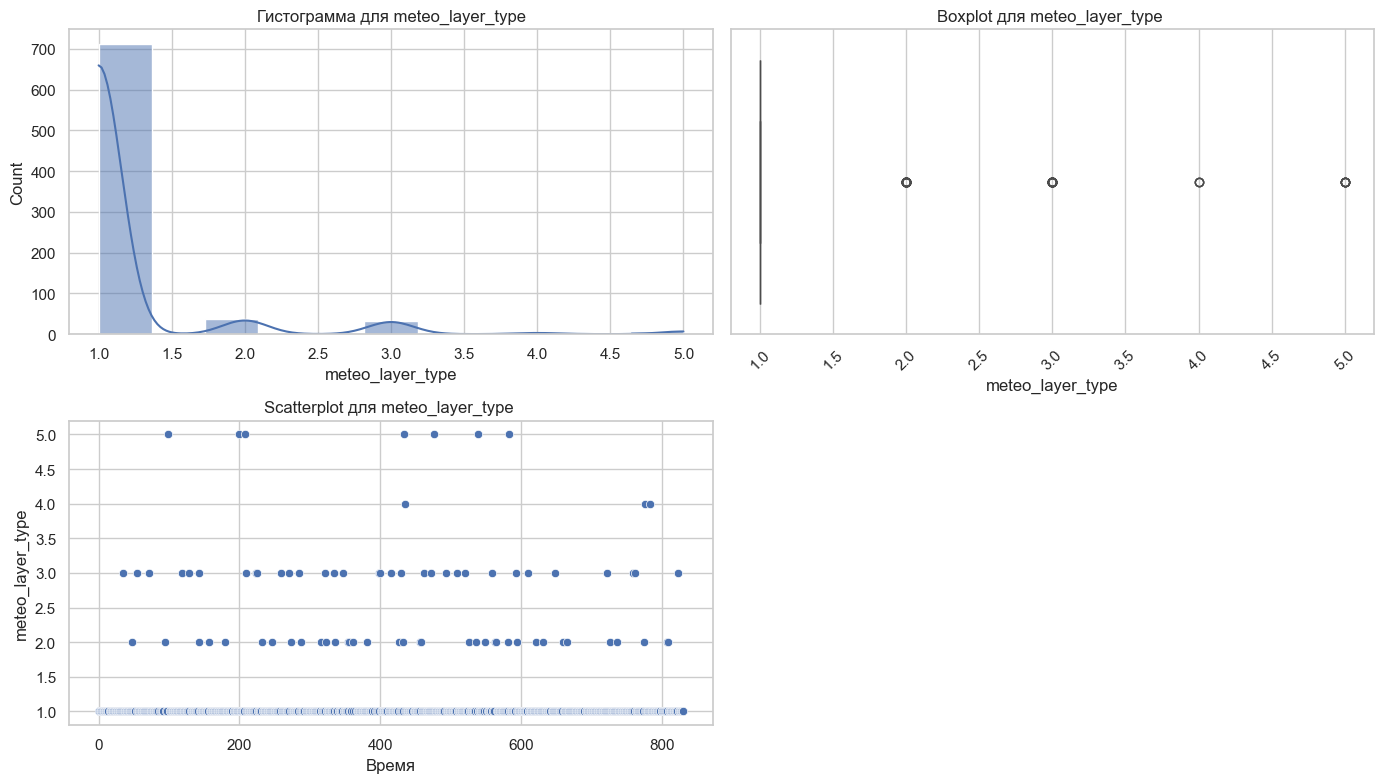

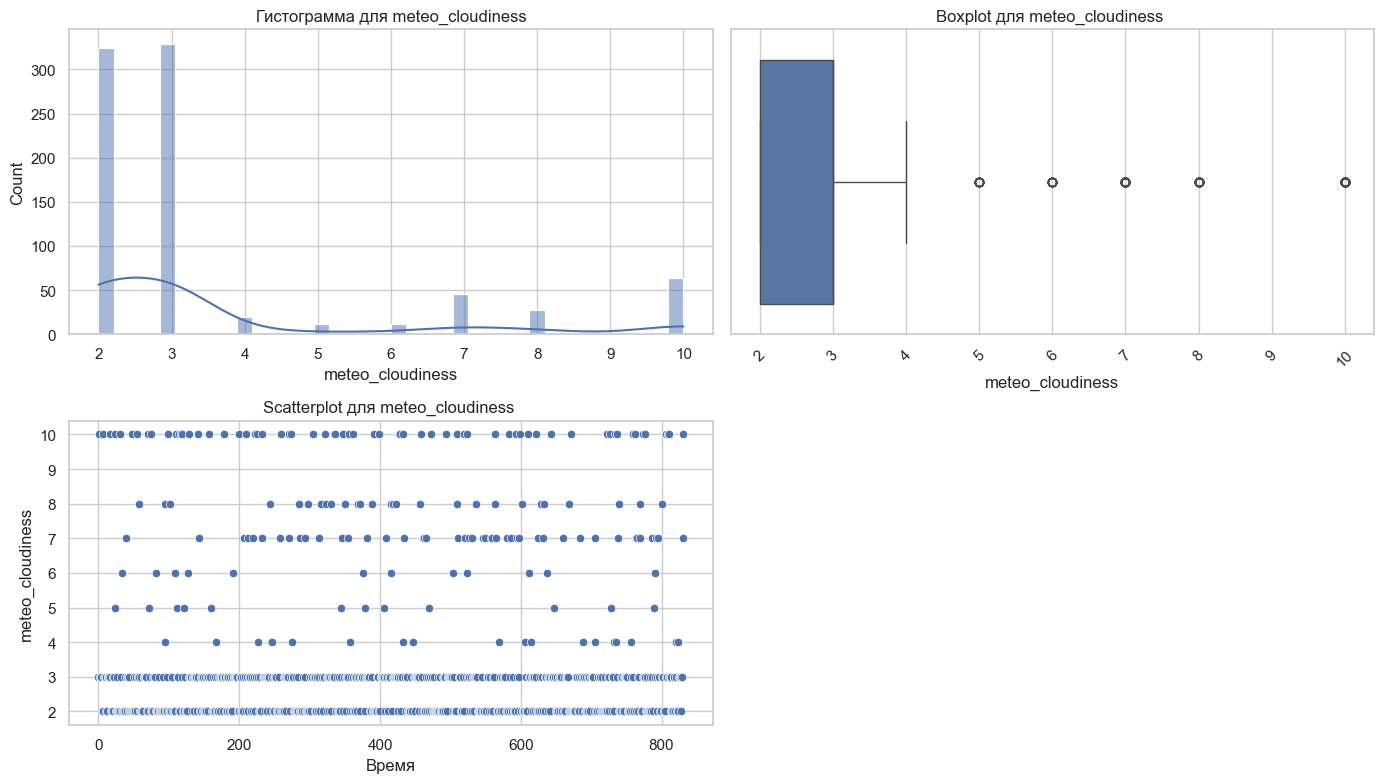

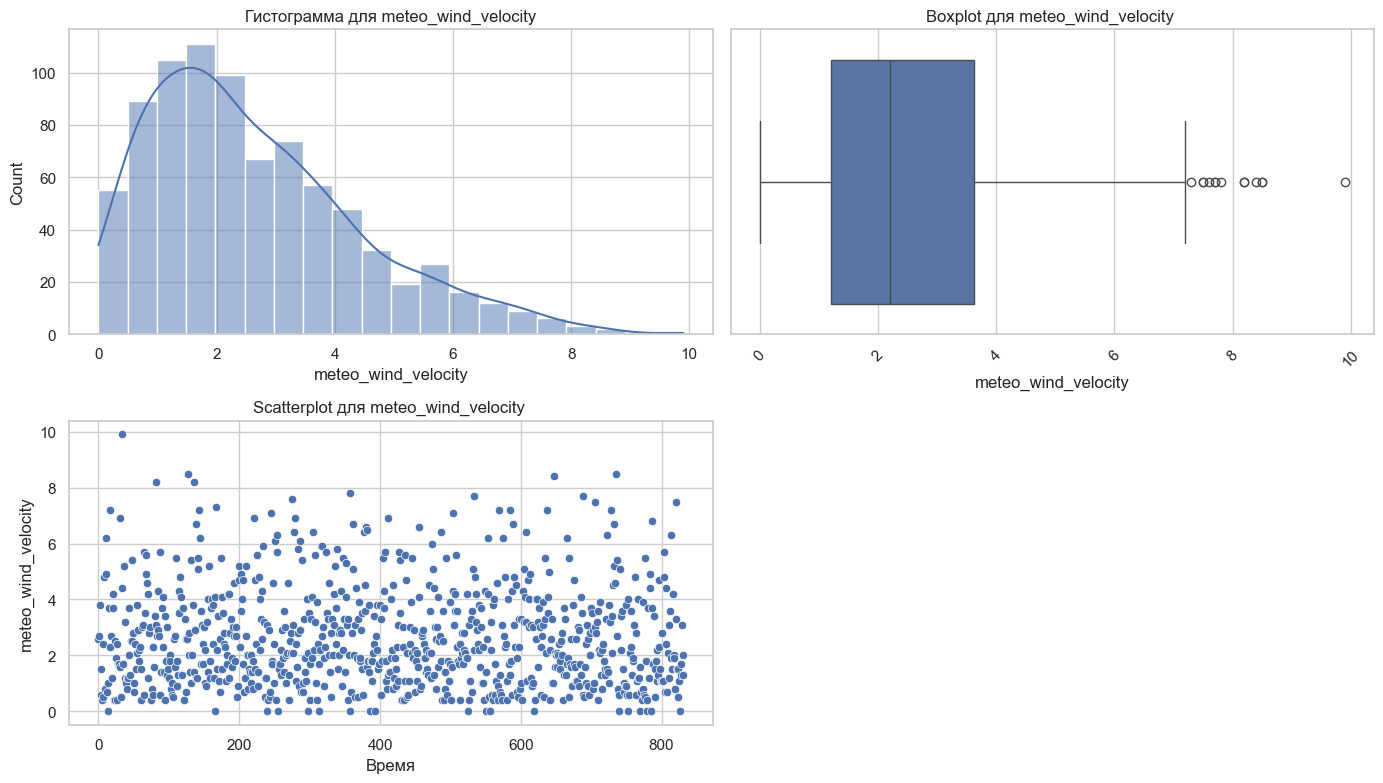

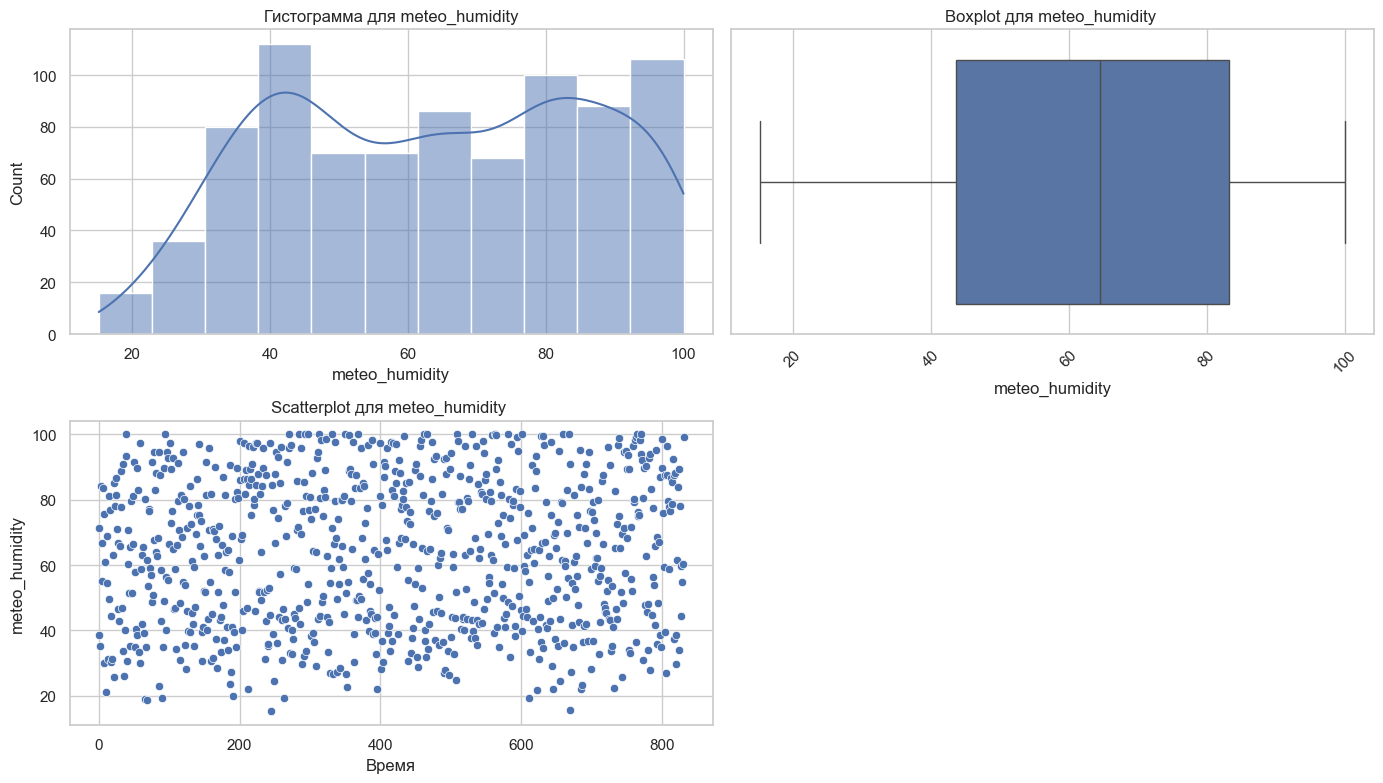

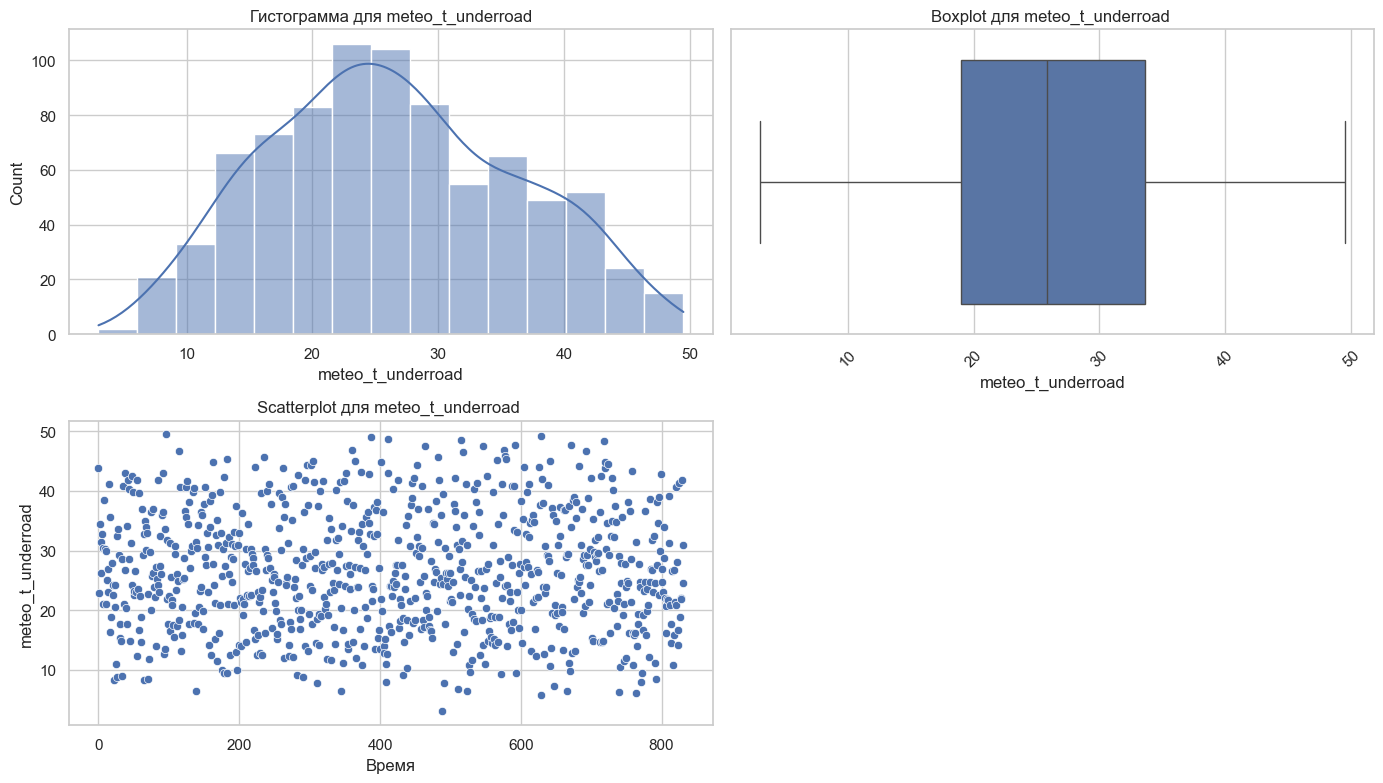

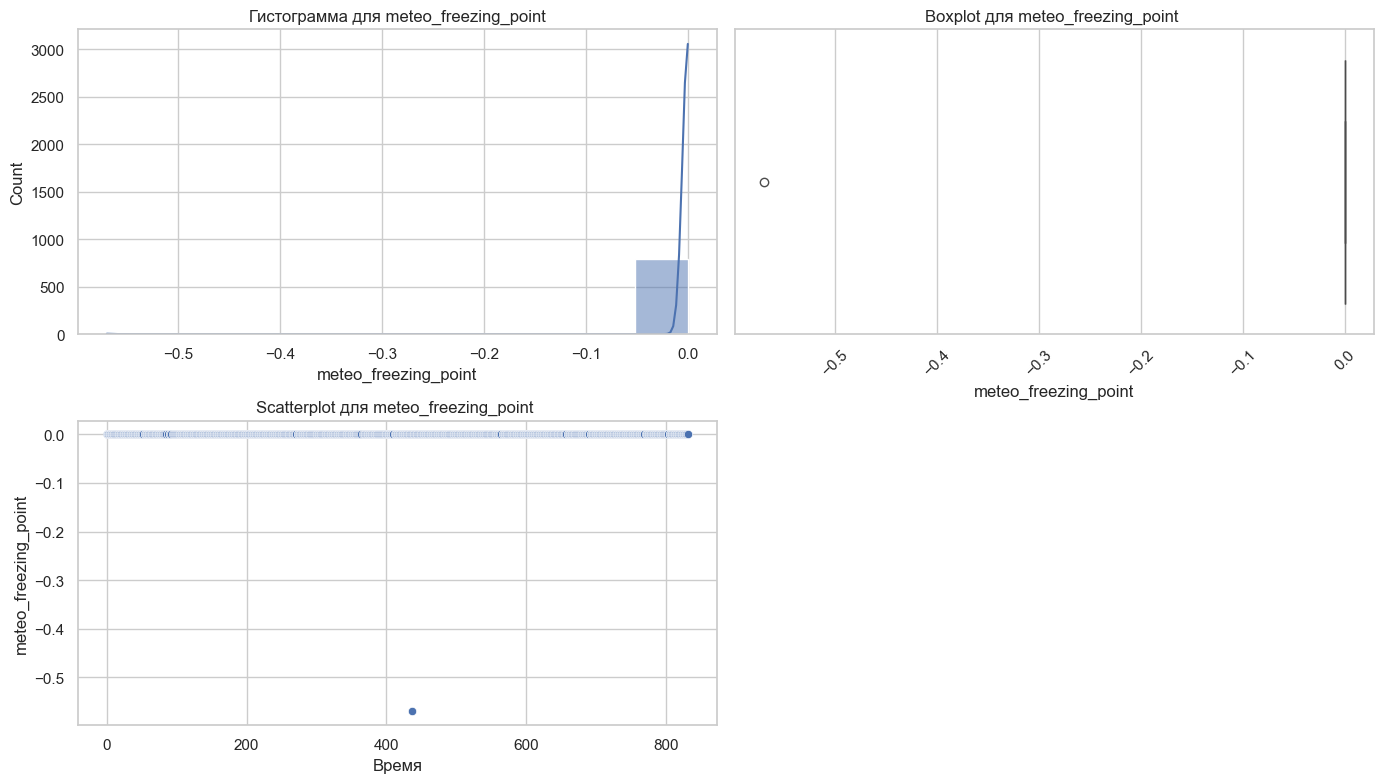

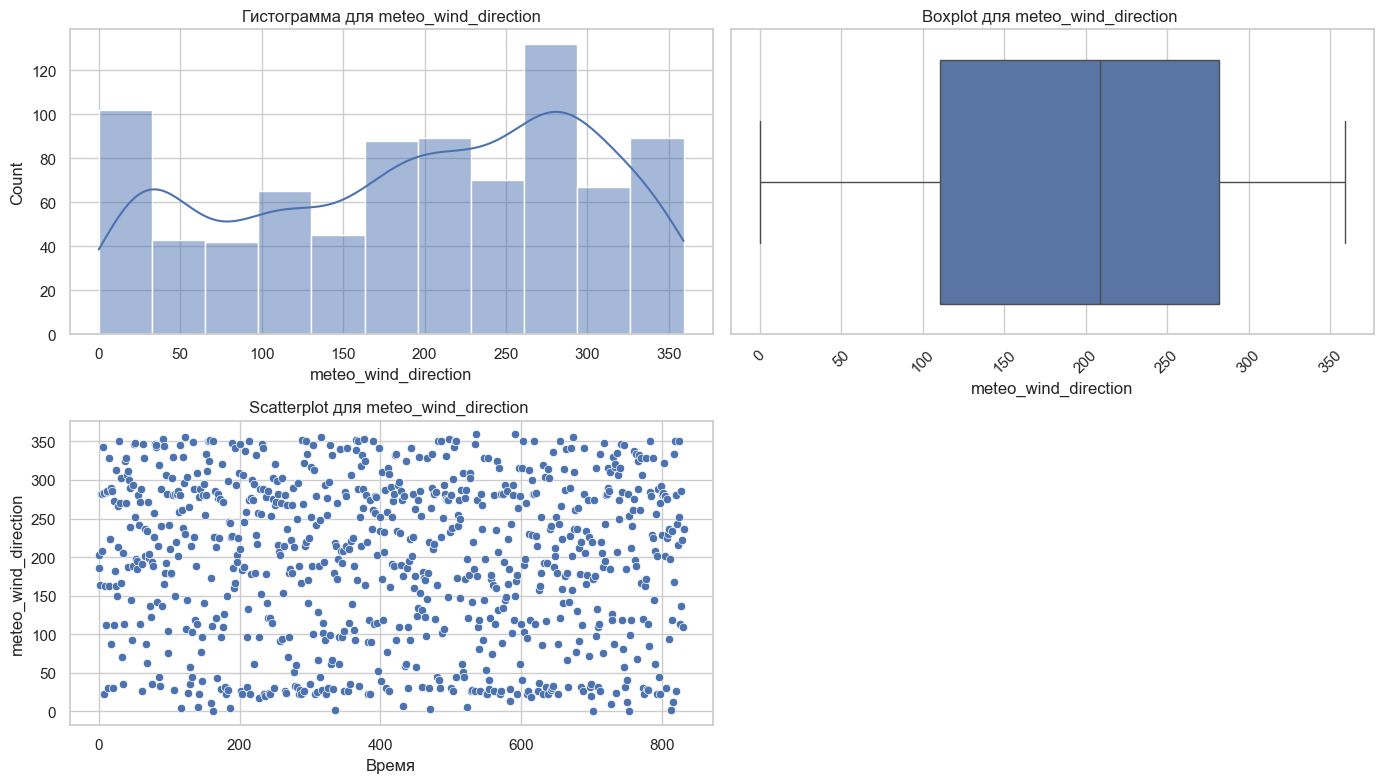

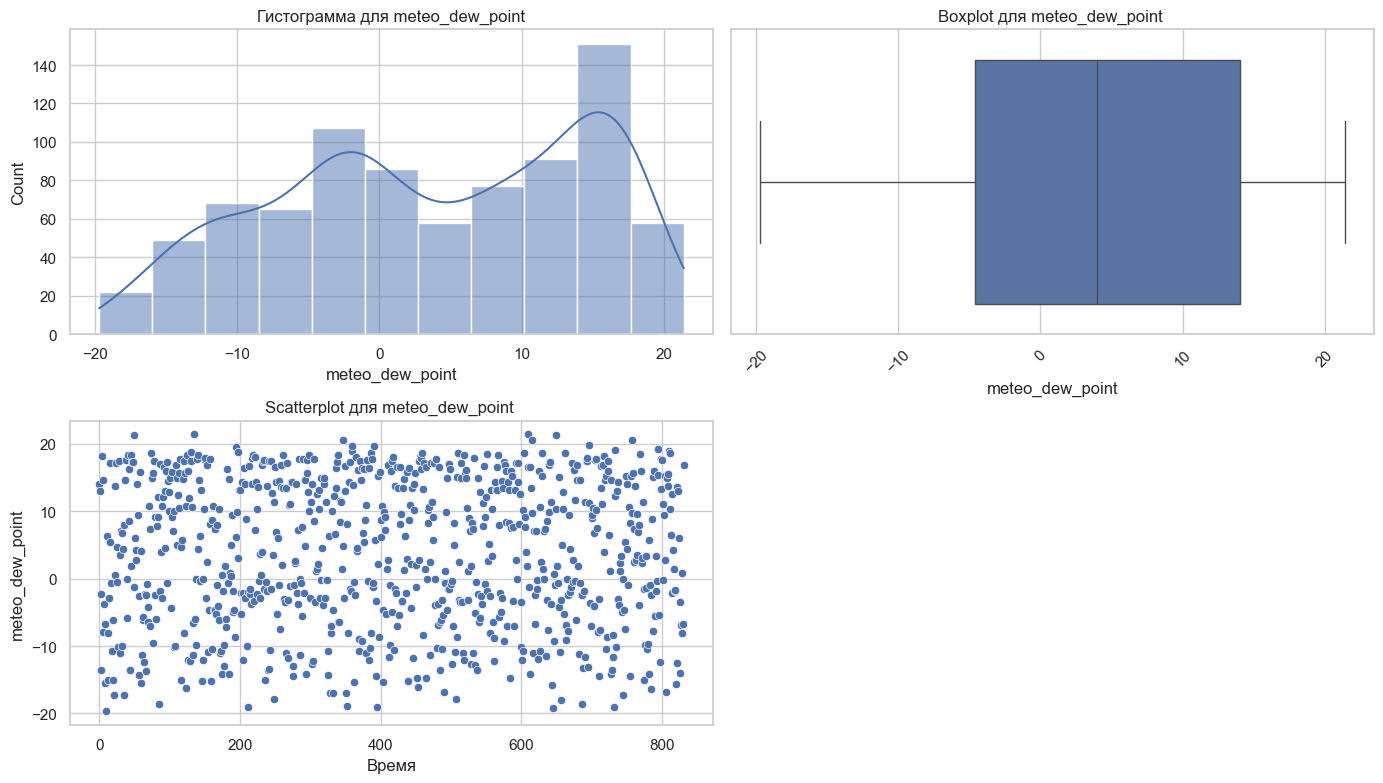

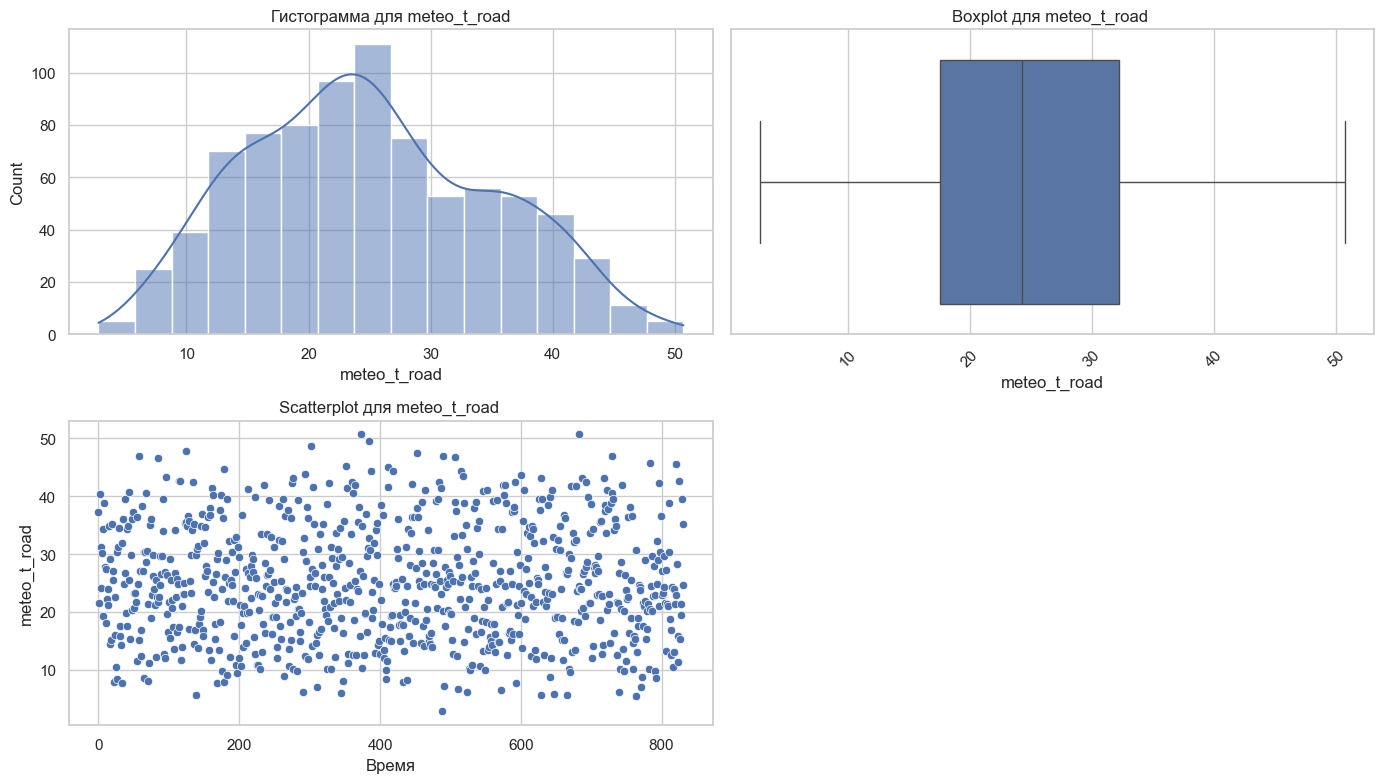

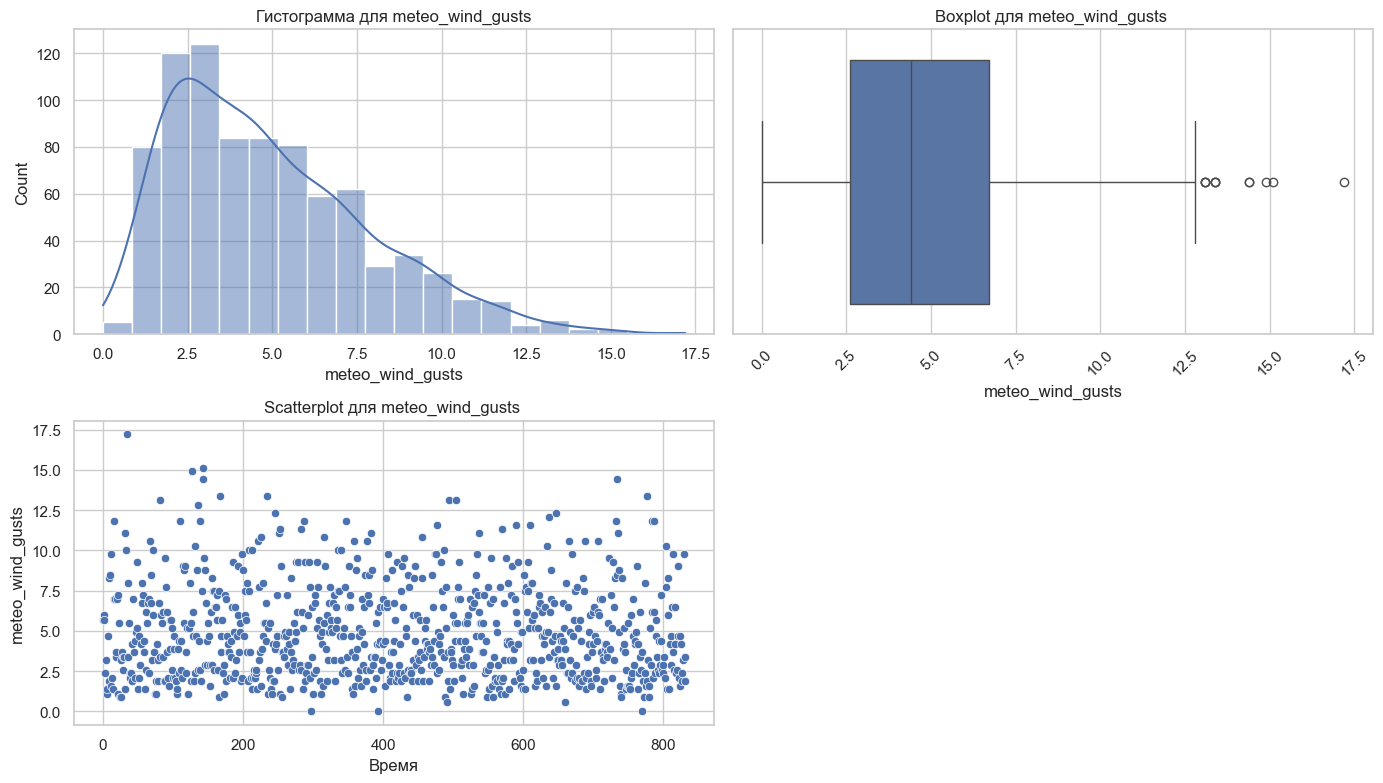

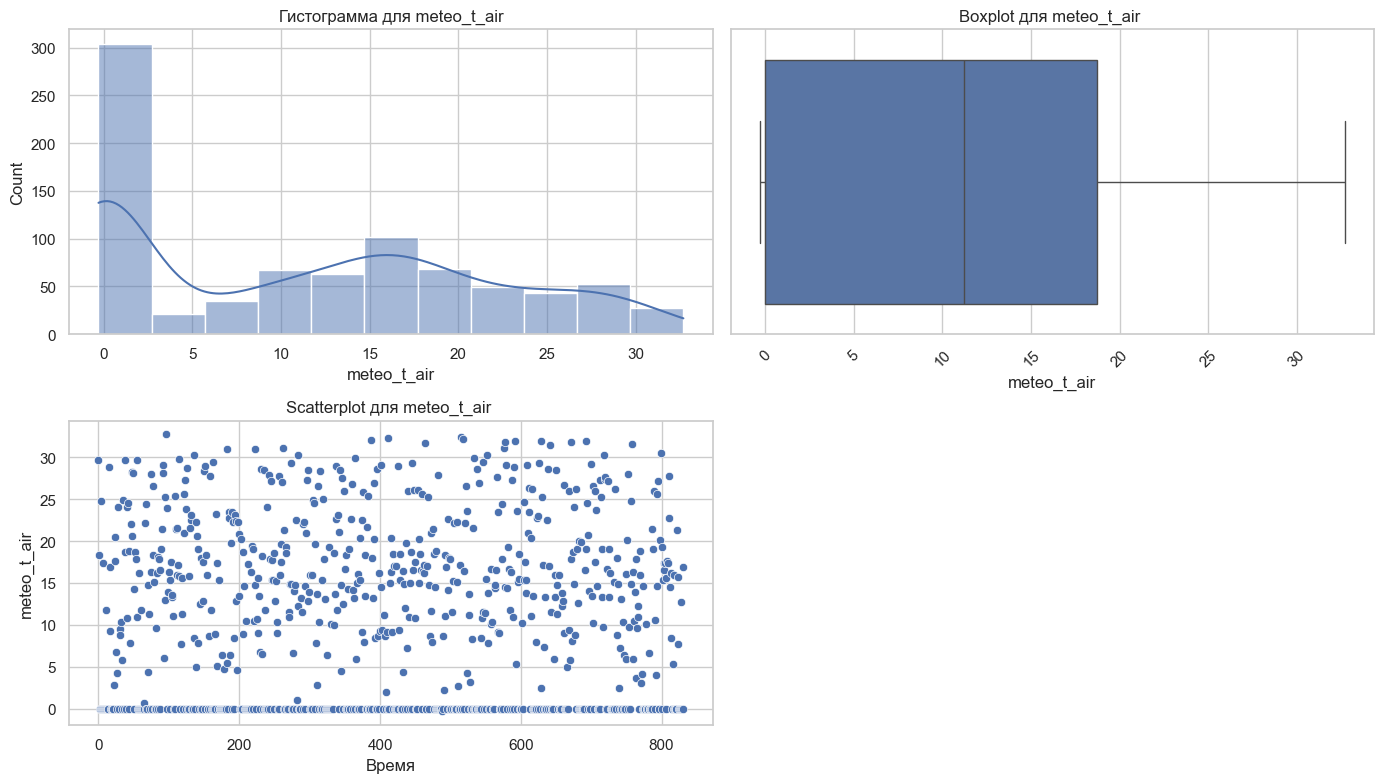

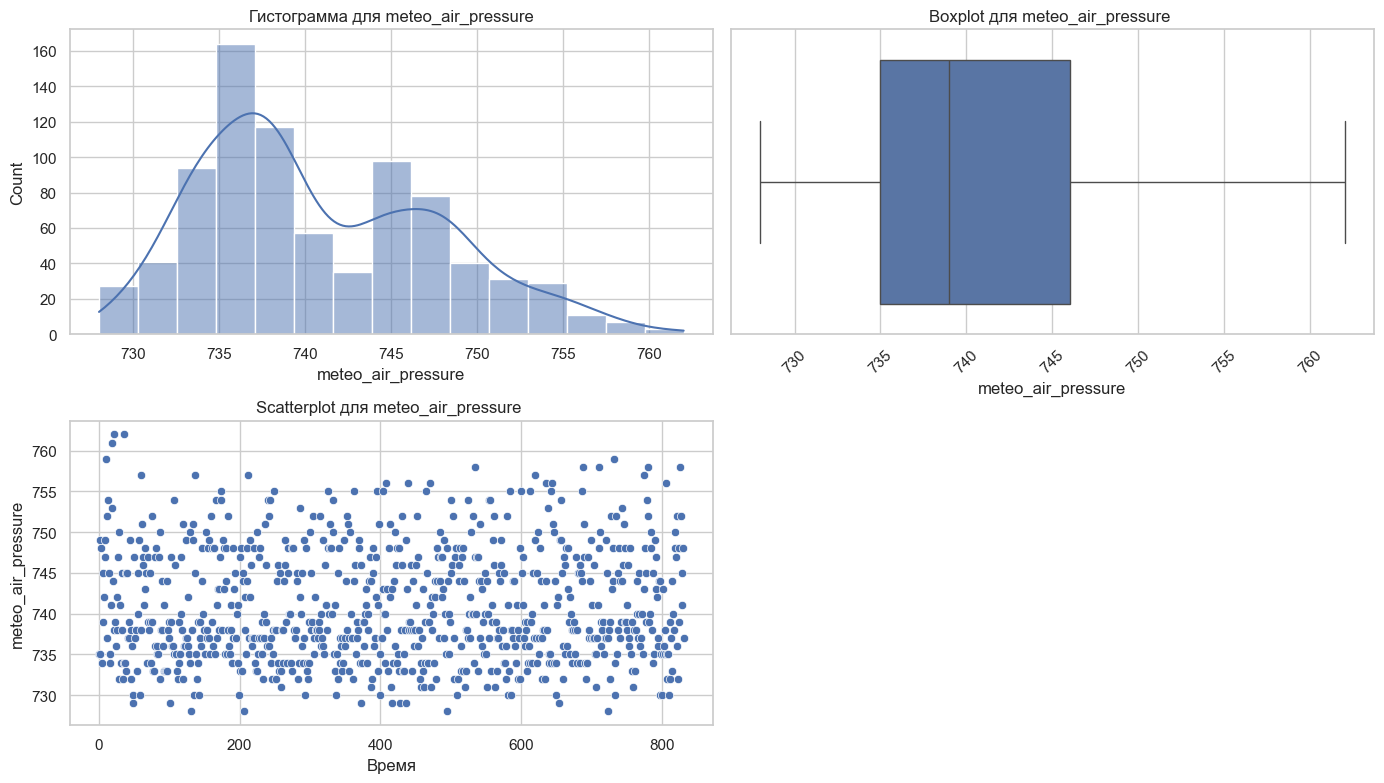

In [8]:
columns_test = [col for col in result_df_test.columns if col not in ['id', 'configuration_item_id']]
  

sns.set(style="whitegrid")

# Построение графиков
for col in columns_test:
    plt.figure(figsize=(14, 8))
    
    # Гистограмма
    plt.subplot(2, 2, 1)
    sns.histplot(result_df_test[col], kde=True)
    plt.title(f'Гистограмма для {col}')
    
    # Boxplot 
    plt.subplot(2, 2, 2)
   
    sns.boxplot(x=result_df_test[col])
    plt.xticks(rotation=45)
    plt.title(f'Boxplot для {col} ')

    # Scatterplot
    plt.subplot(2, 2, 3)
    sns.scatterplot( result_df_test[col])
    plt.xlabel('Время')
    plt.ylabel(col)
    plt.title(f'Scatterplot для {col} ')
    
   
    plt.tight_layout()
    plt.show()

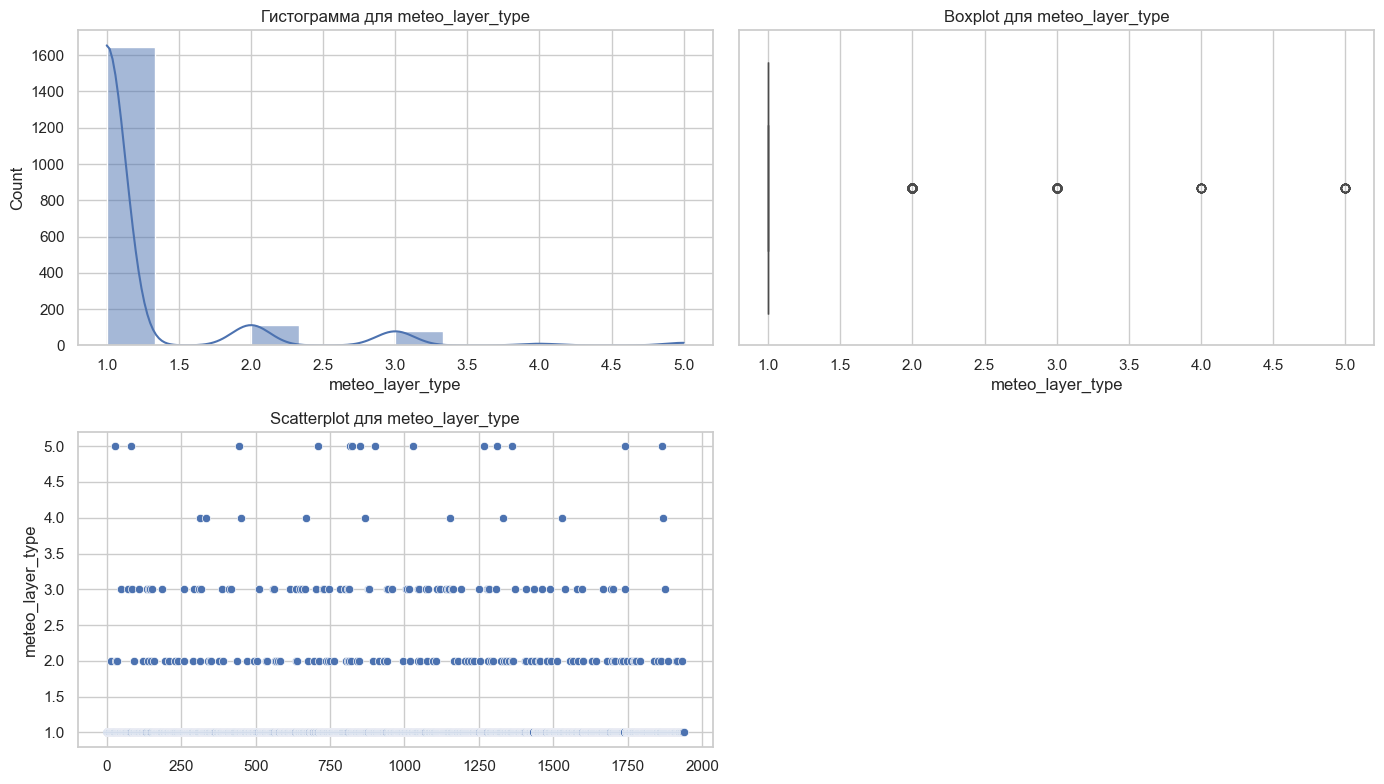

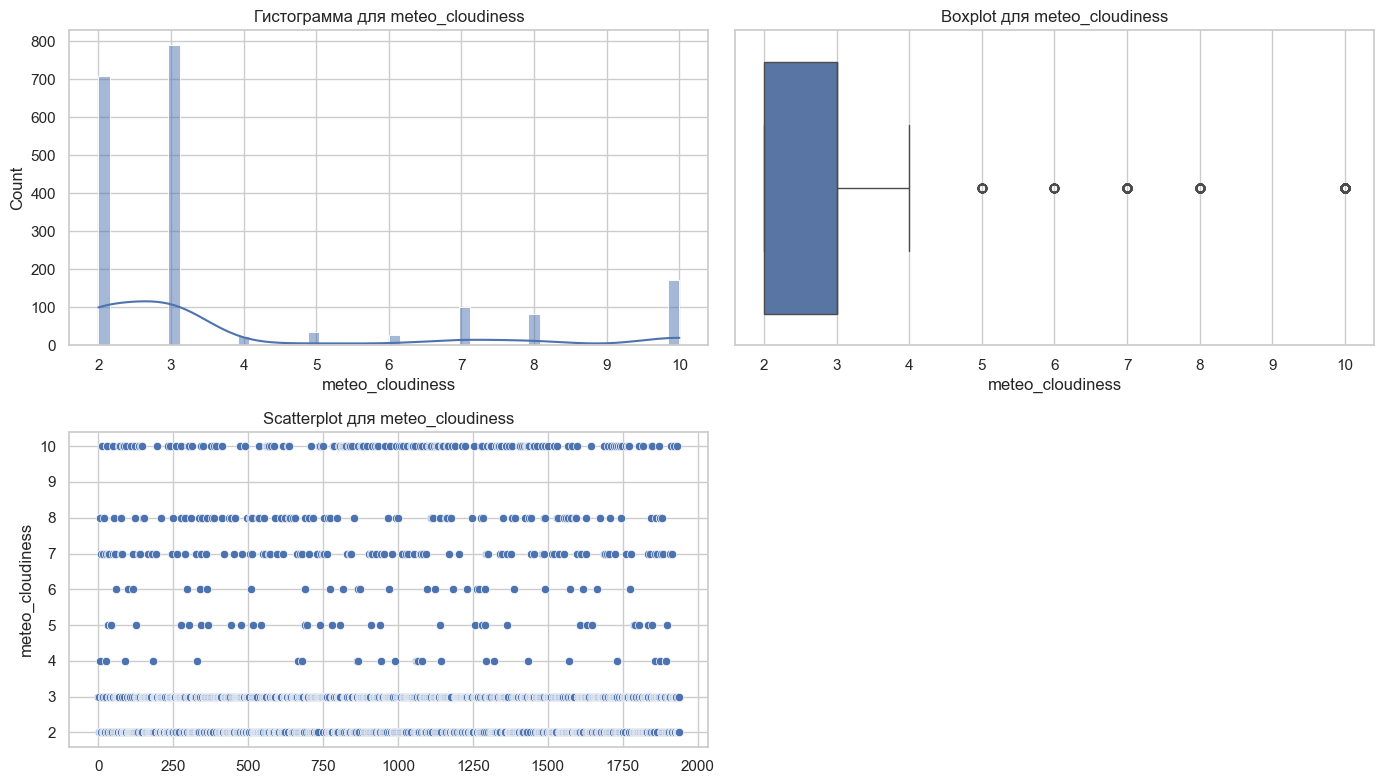

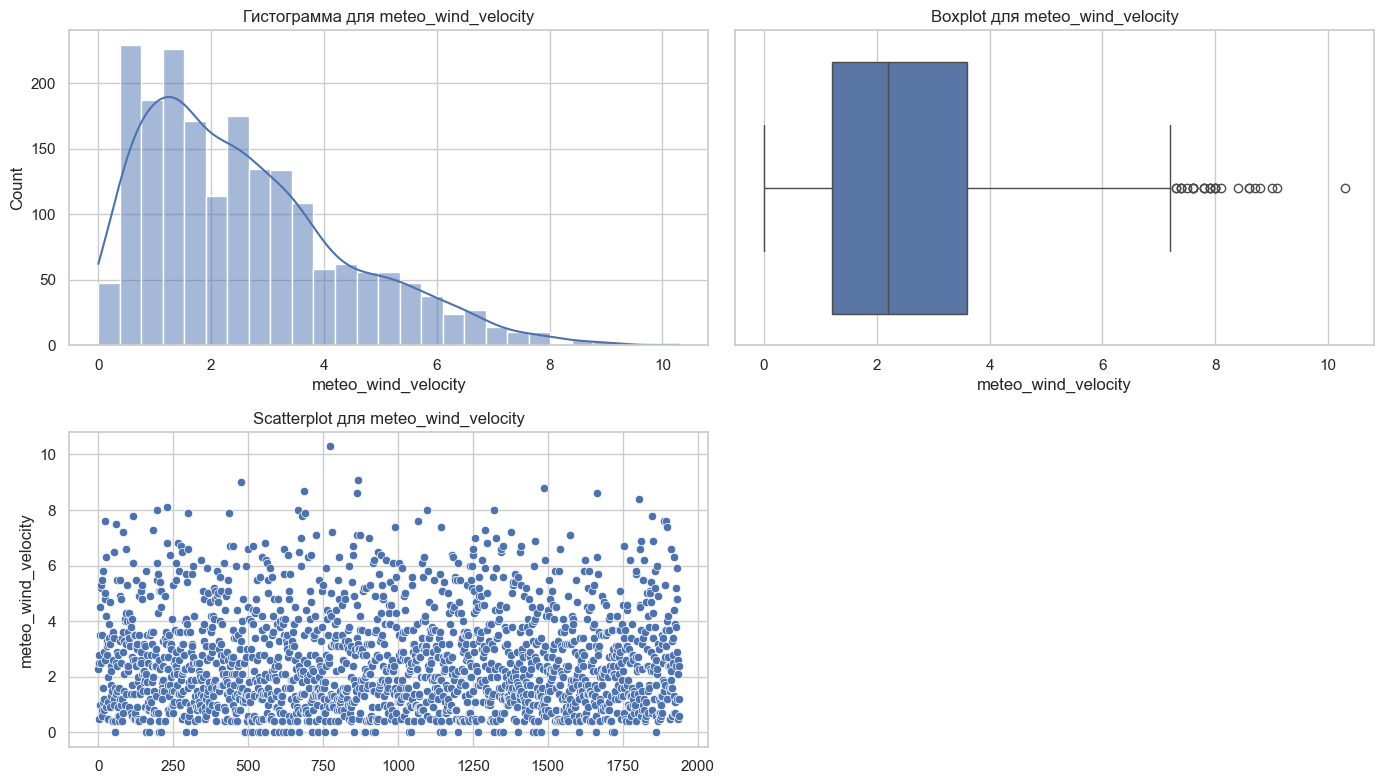

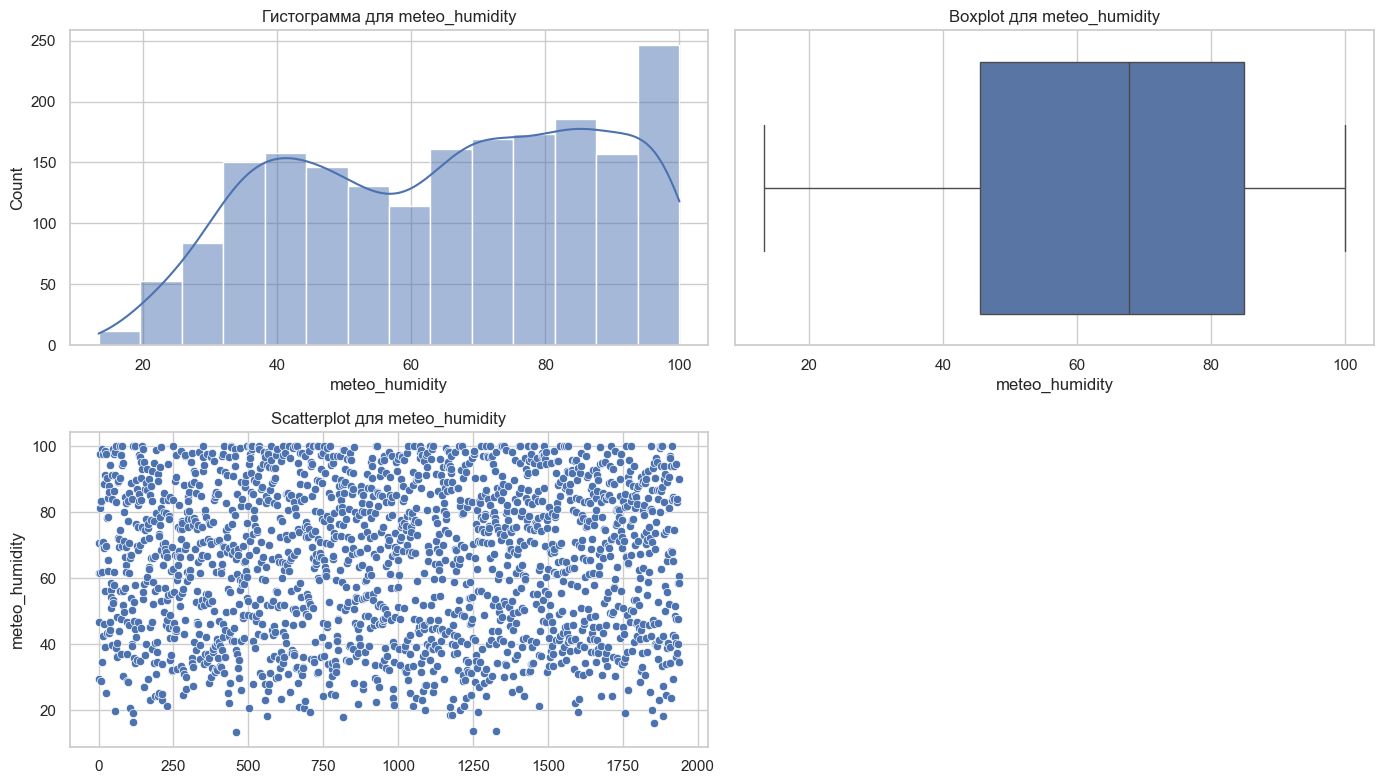

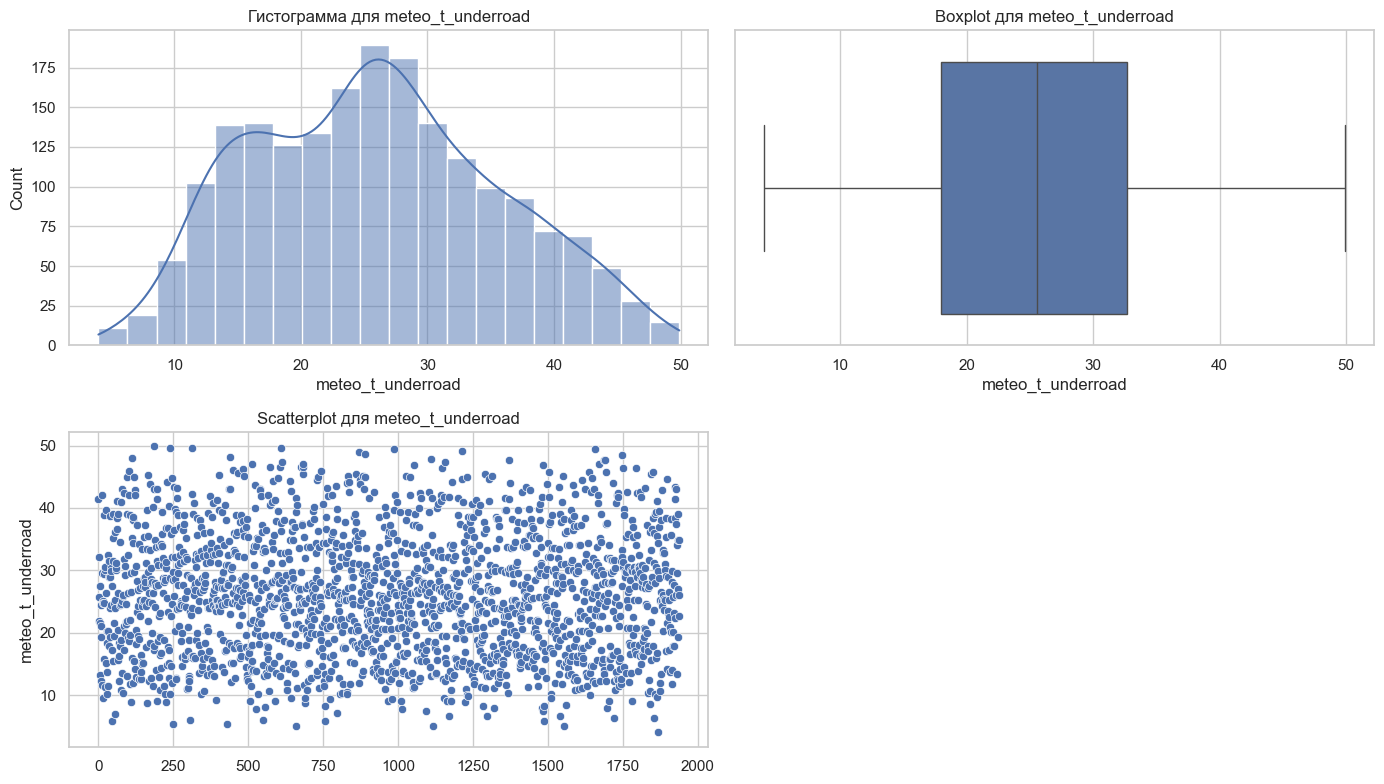

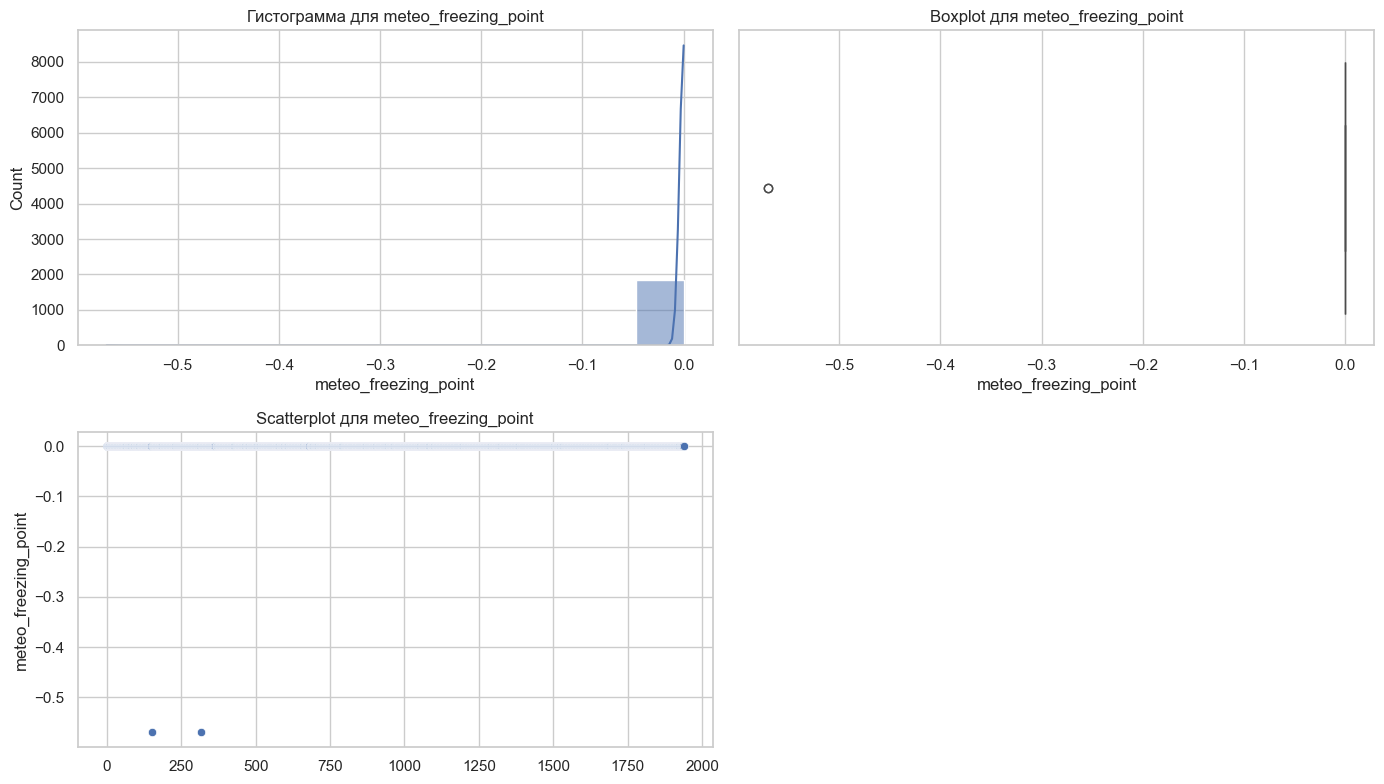

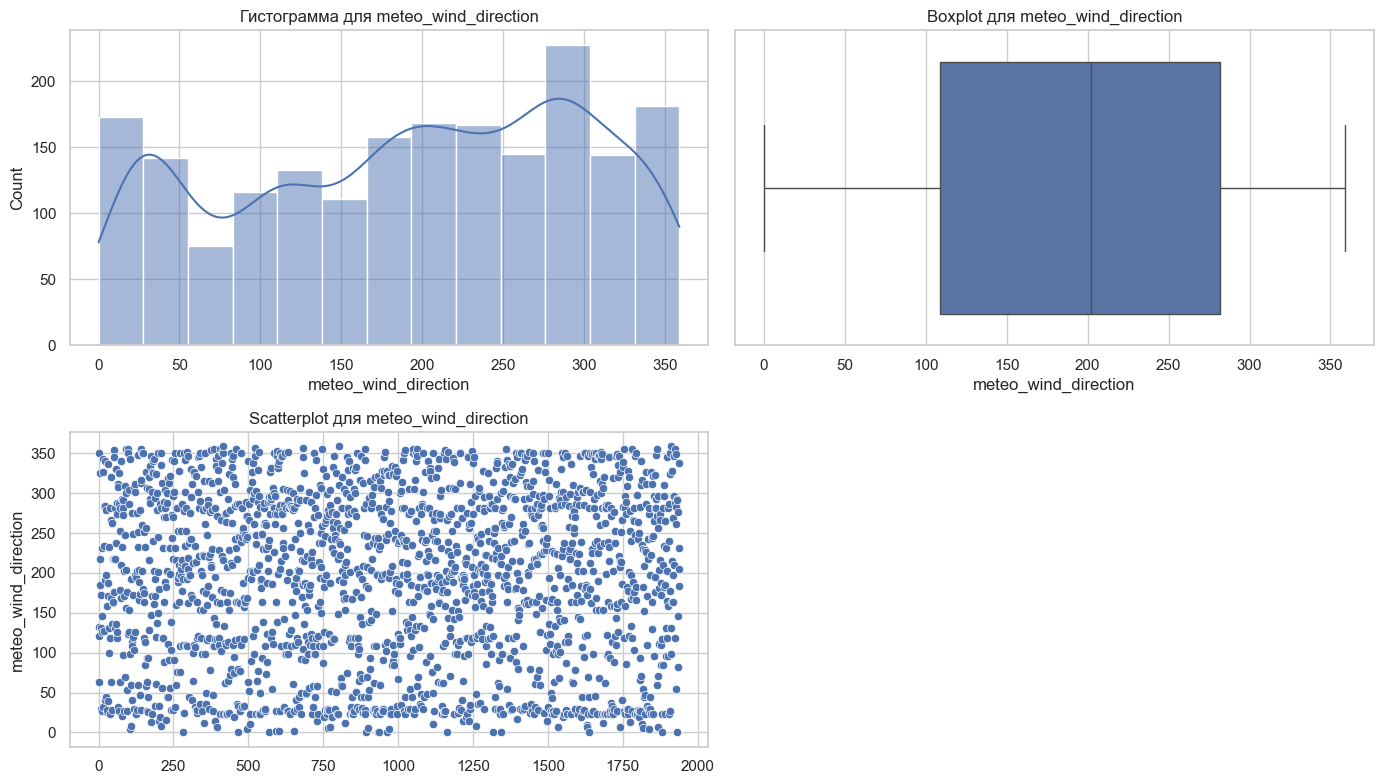

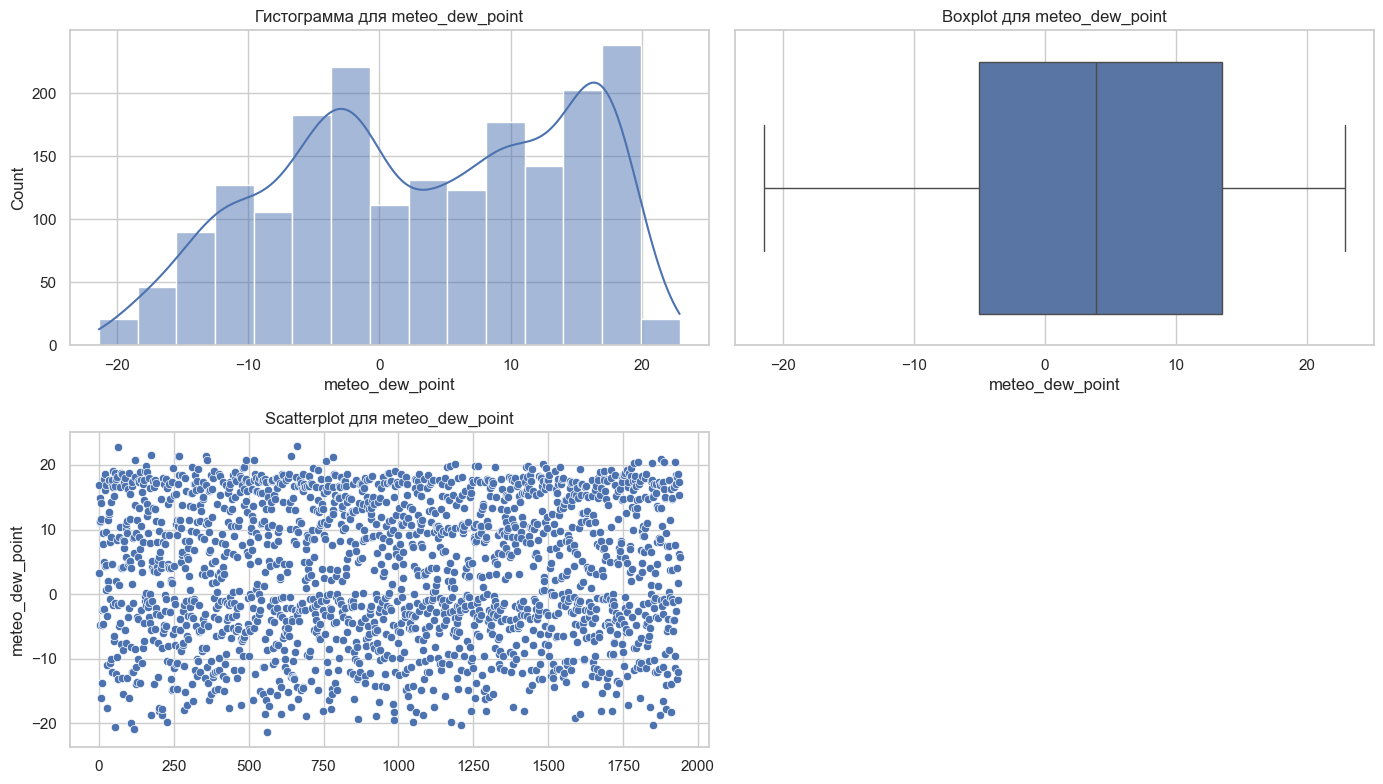

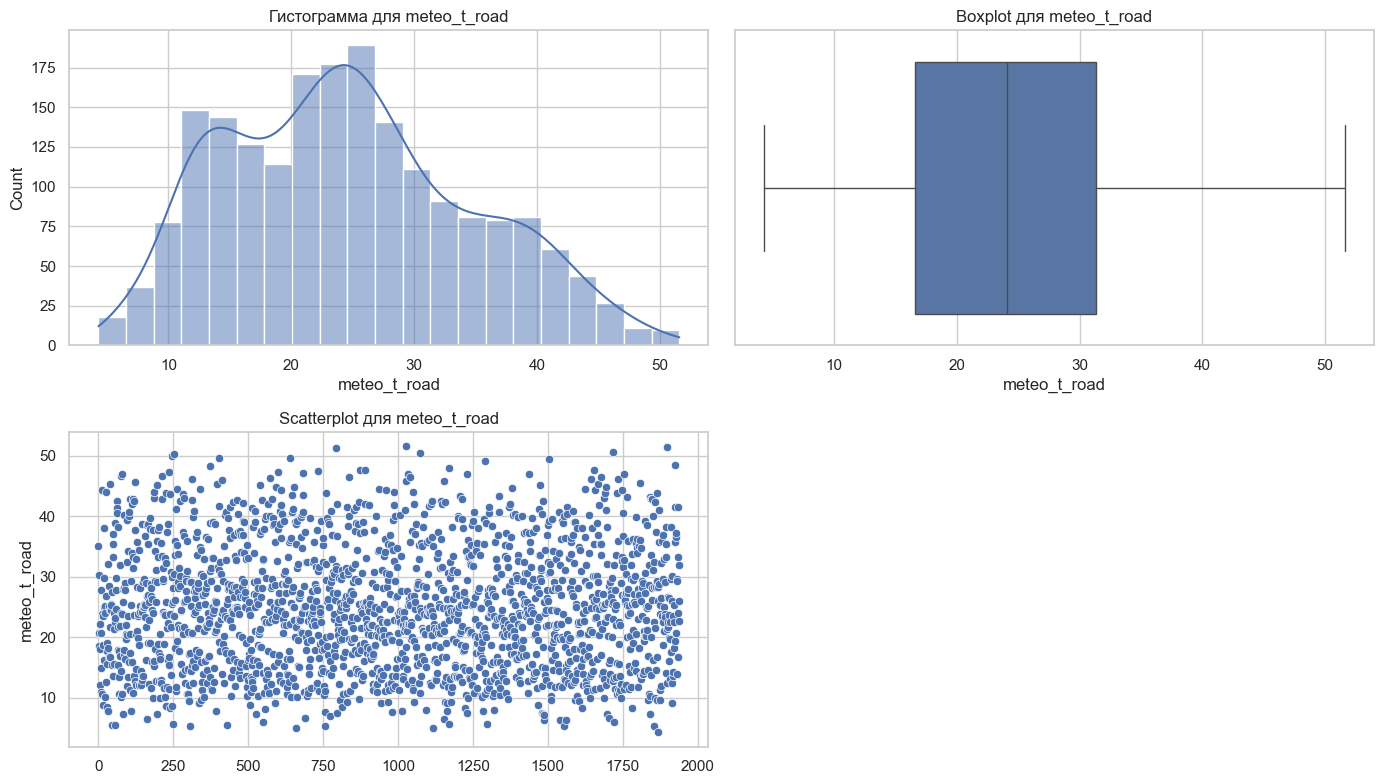

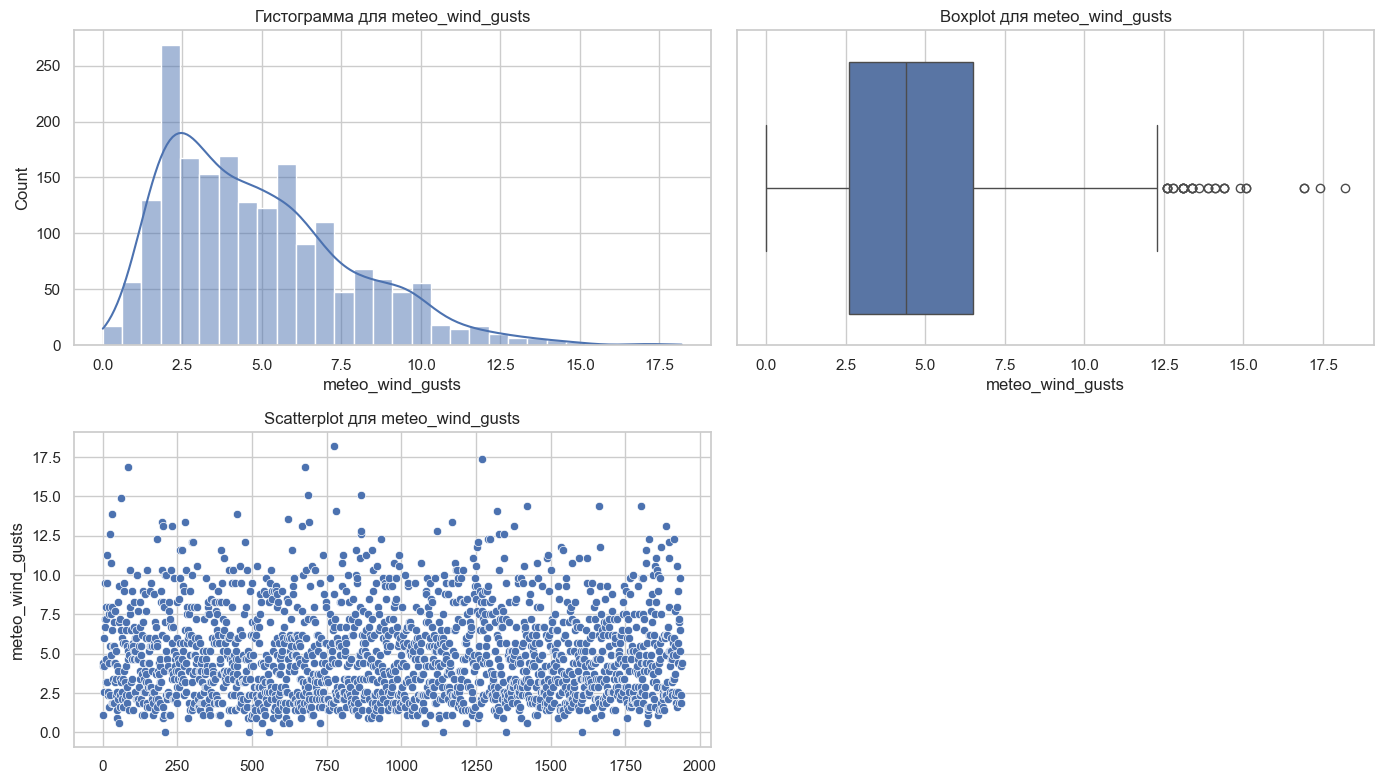

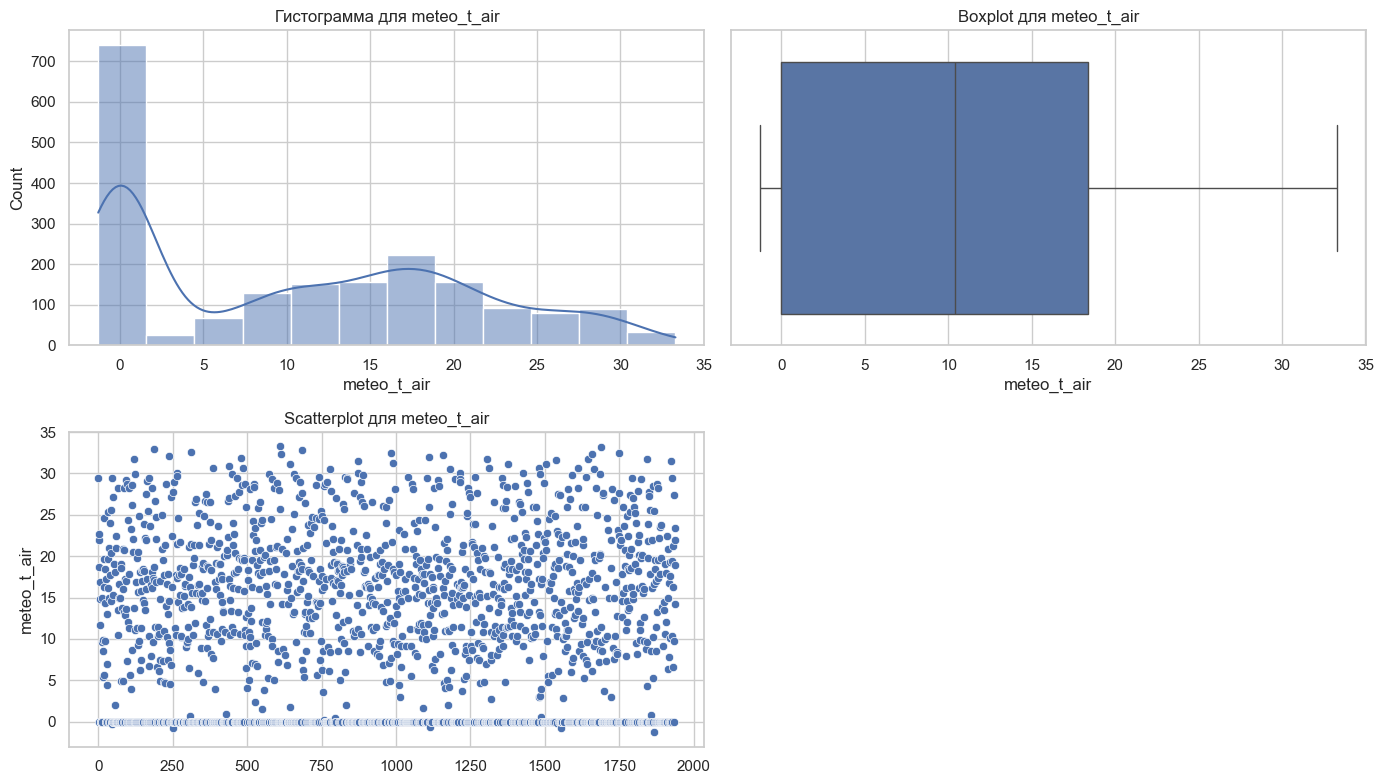

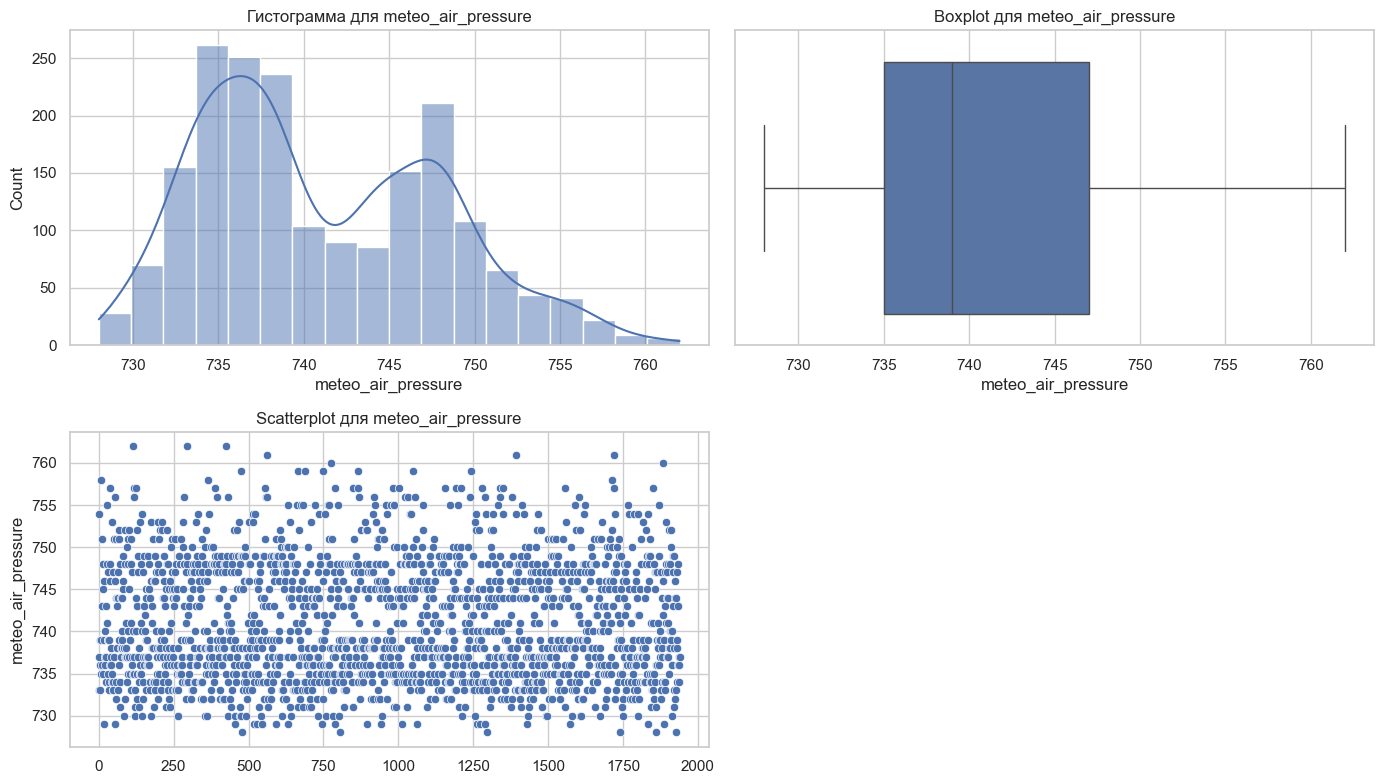

In [9]:
columns_train = [col for col in result_df.columns if col not in ['id', 'configuration_item_id']]
  # Колонка времени

sns.set(style="whitegrid")

# Построение графиков
for col in columns_train:
    plt.figure(figsize=(14, 8))
    
    # Гистограмма
    plt.subplot(2, 2, 1)
    sns.histplot(result_df[col], kde=True)
    plt.title(f'Гистограмма для {col}')
    
    # Boxplot
    plt.subplot(2, 2, 2)
    sns.boxplot(x=result_df[col])
    plt.title(f'Boxplot для {col}')
  
    plt.subplot(2, 2, 3)
    sns.scatterplot(result_df[col])
    plt.title(f'Scatterplot для {col}')
    
    
    
    plt.tight_layout()
    plt.show()

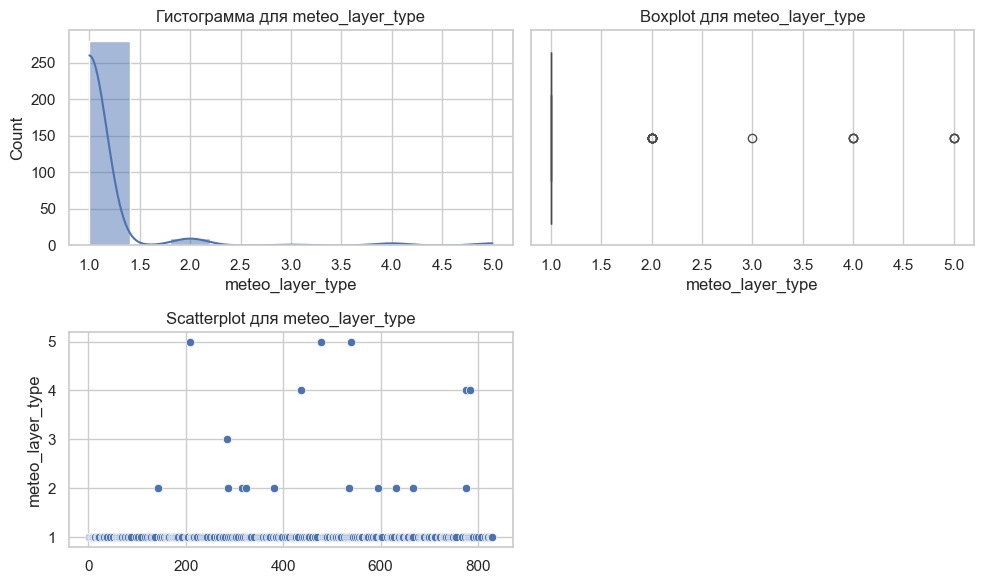

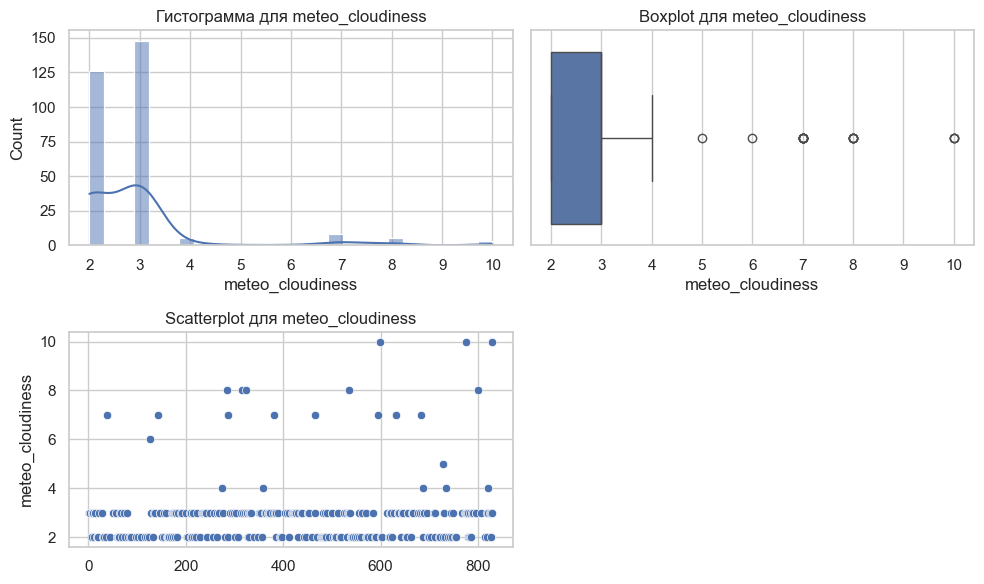

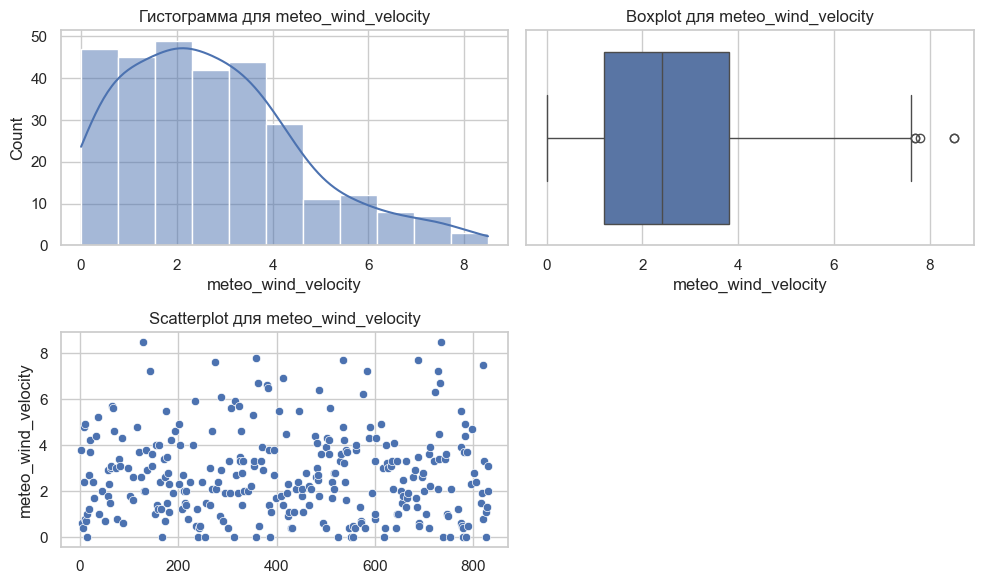

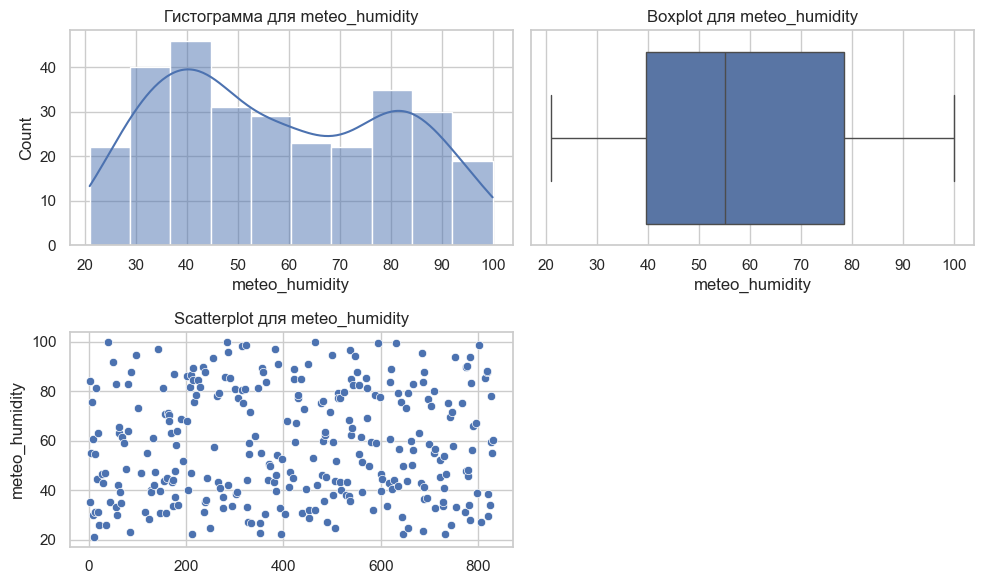

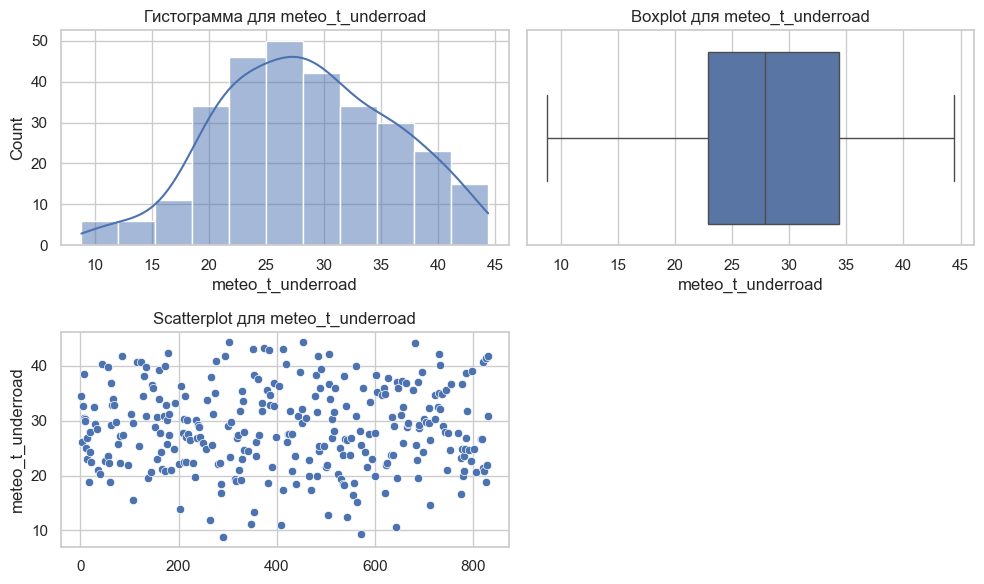

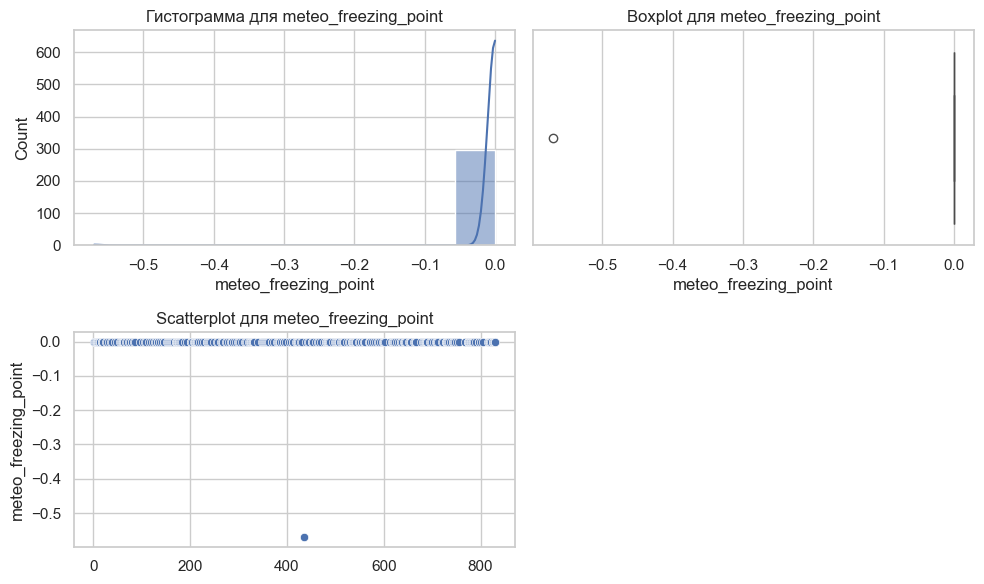

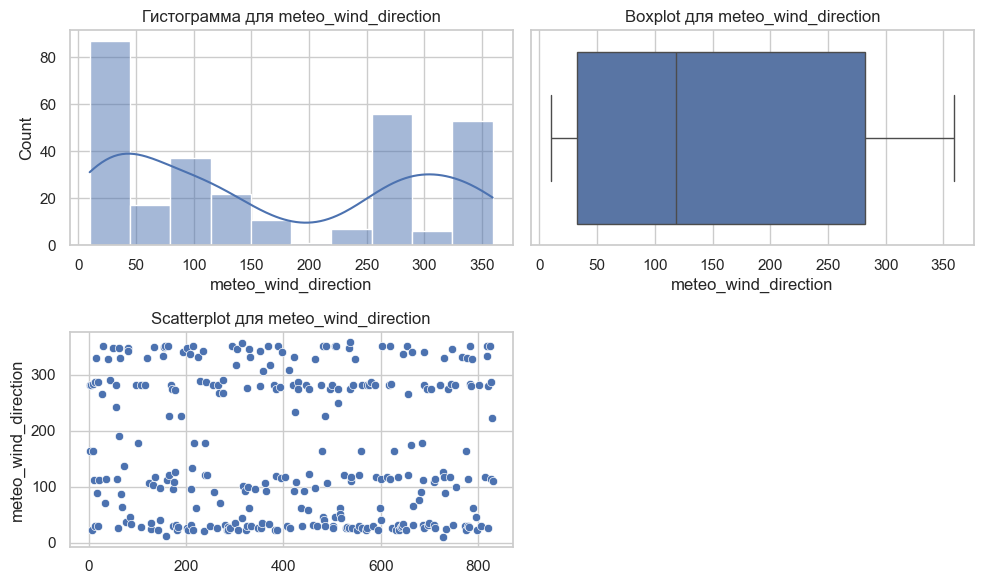

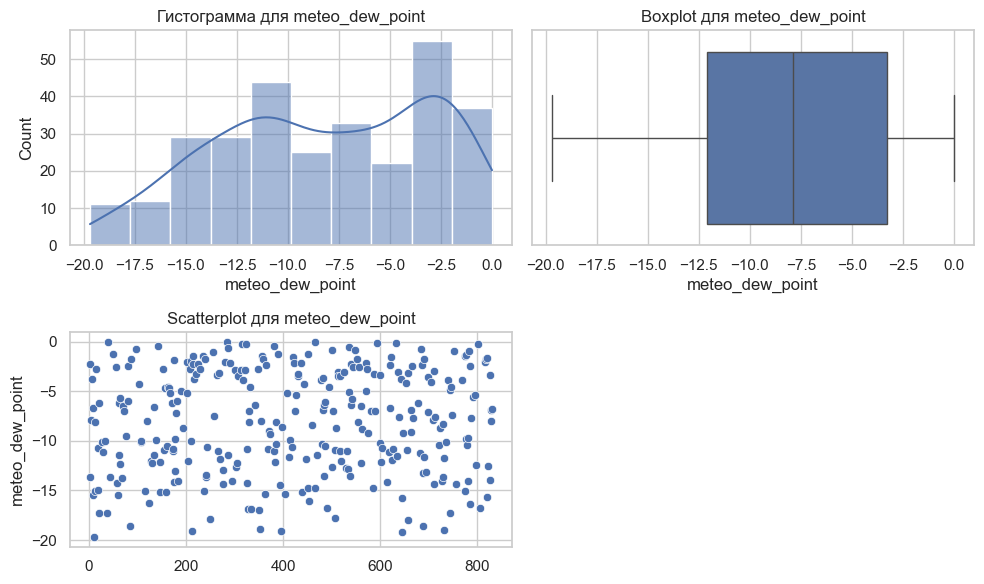

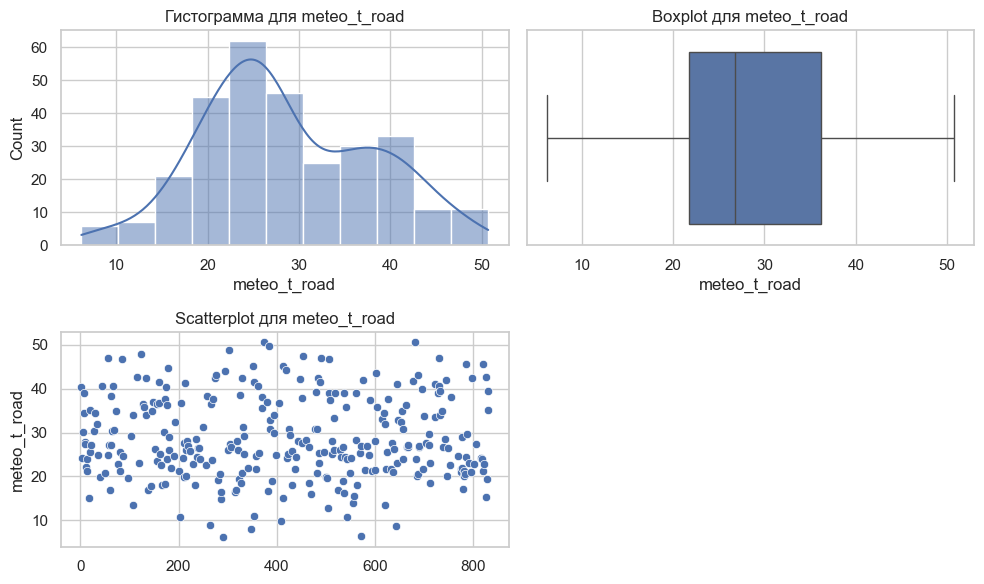

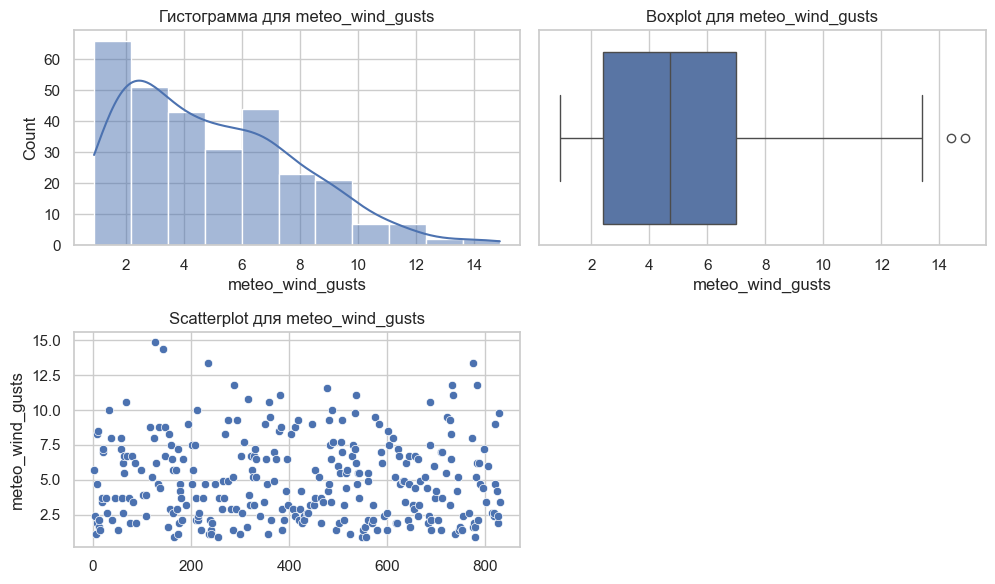

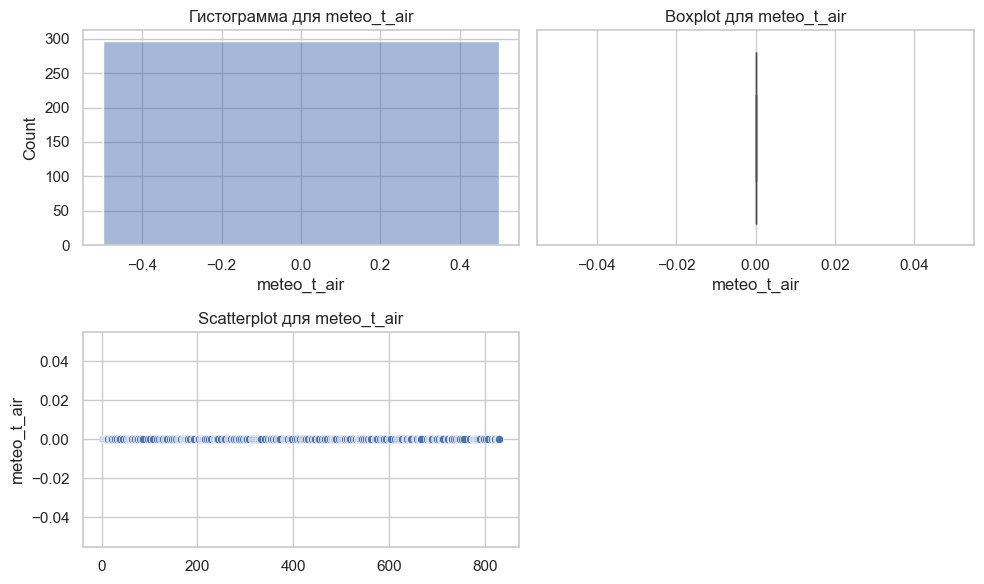

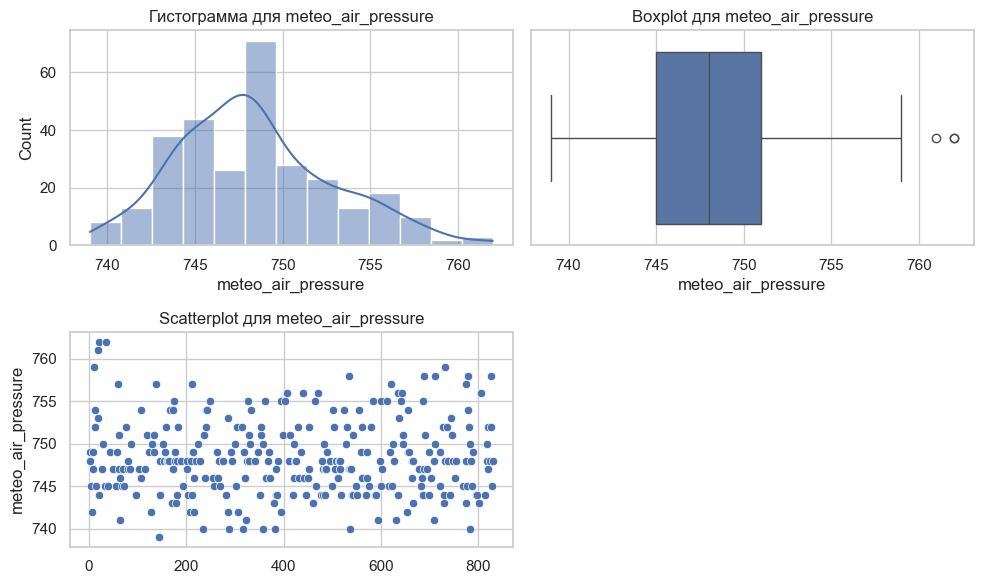

In [10]:
columns_24 = [col for col in station_24445_test.columns if col != 'id']
# Построение графиков
for col in columns_24:
    plt.figure(figsize=(10, 6))
    
    # Гистограмма
    plt.subplot(2, 2, 1)
    sns.histplot(station_24445_test[col], kde=True)
    plt.title(f'Гистограмма для {col}')
    
    # Boxplot
    plt.subplot(2, 2, 2)
    sns.boxplot(x=station_24445_test[col])
    plt.title(f'Boxplot для {col}')
  
    plt.subplot(2, 2, 3)
    sns.scatterplot(station_24445_test[col])
    plt.title(f'Scatterplot для {col}')
    
    plt.tight_layout()
    plt.show()

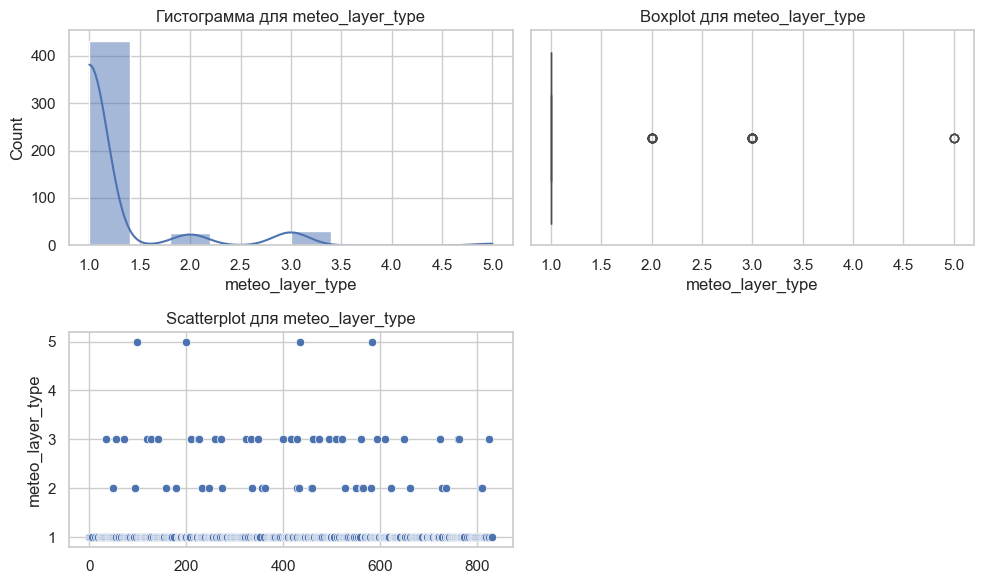

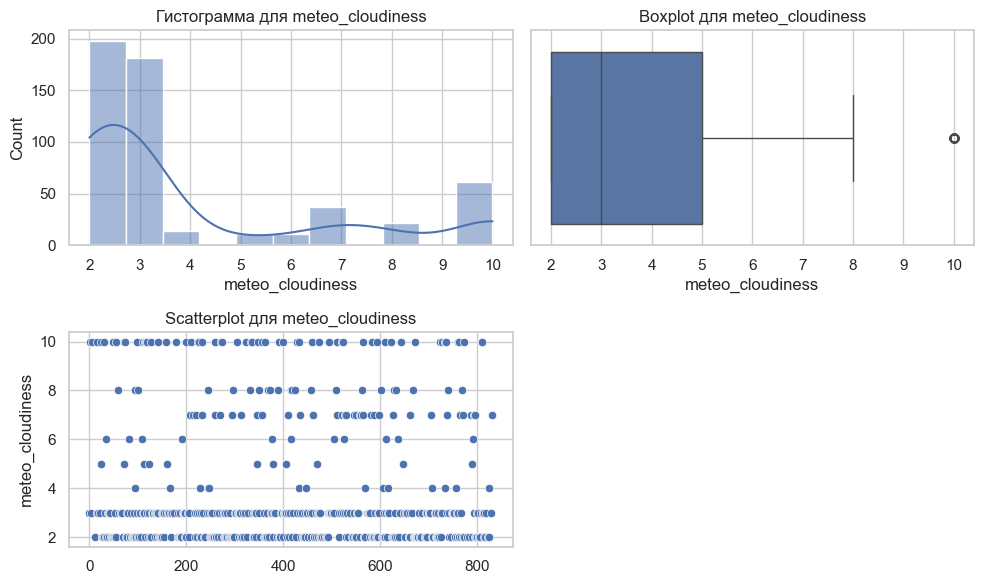

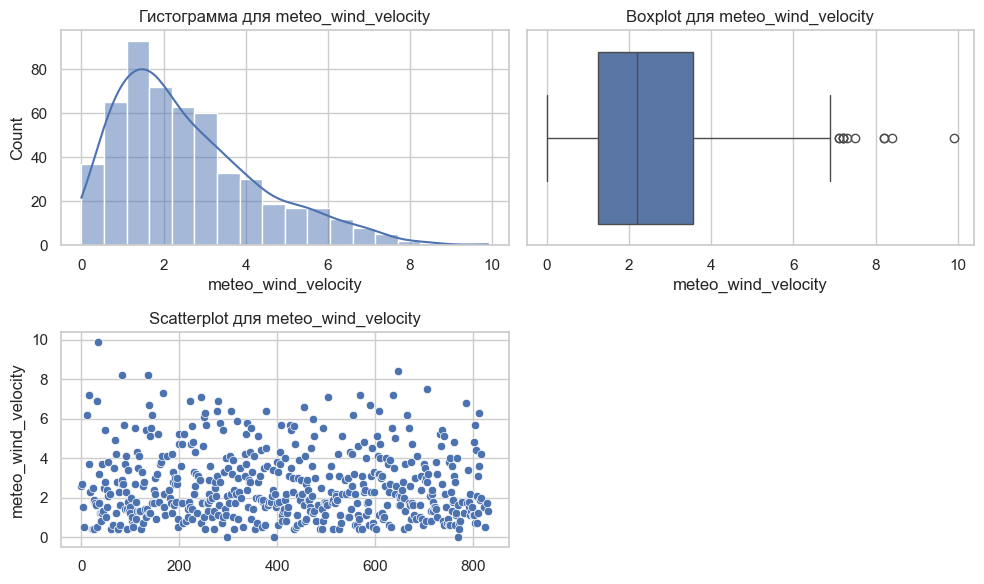

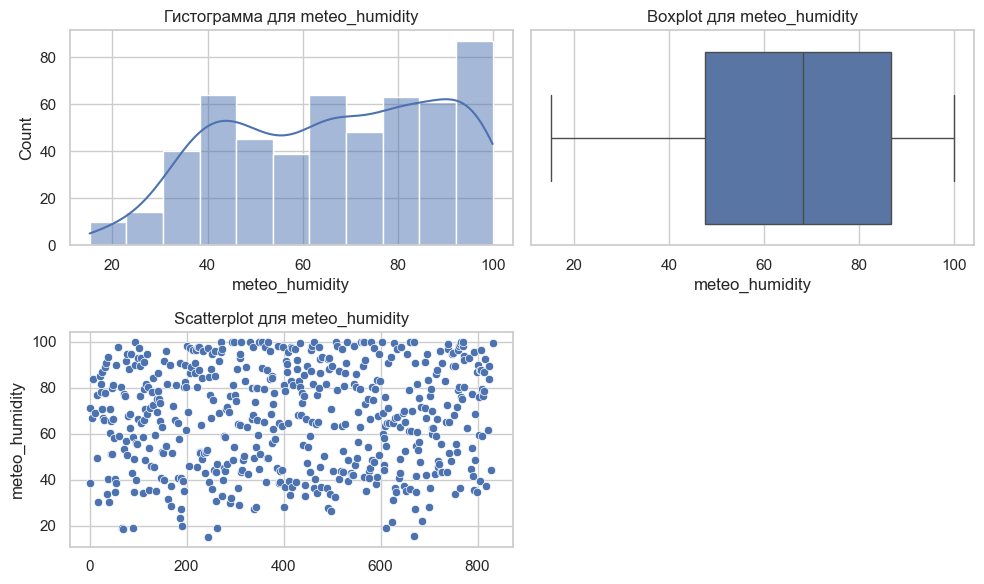

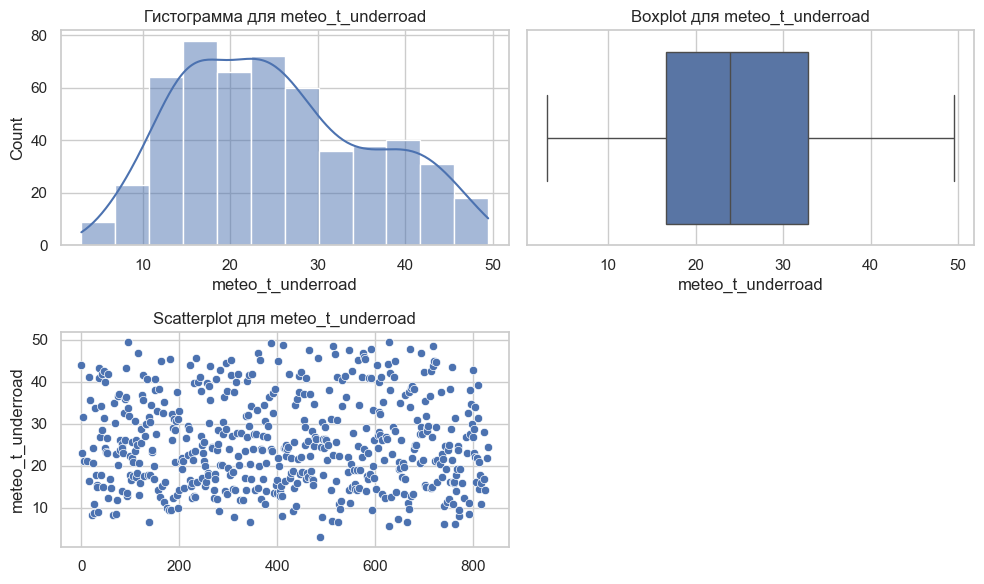

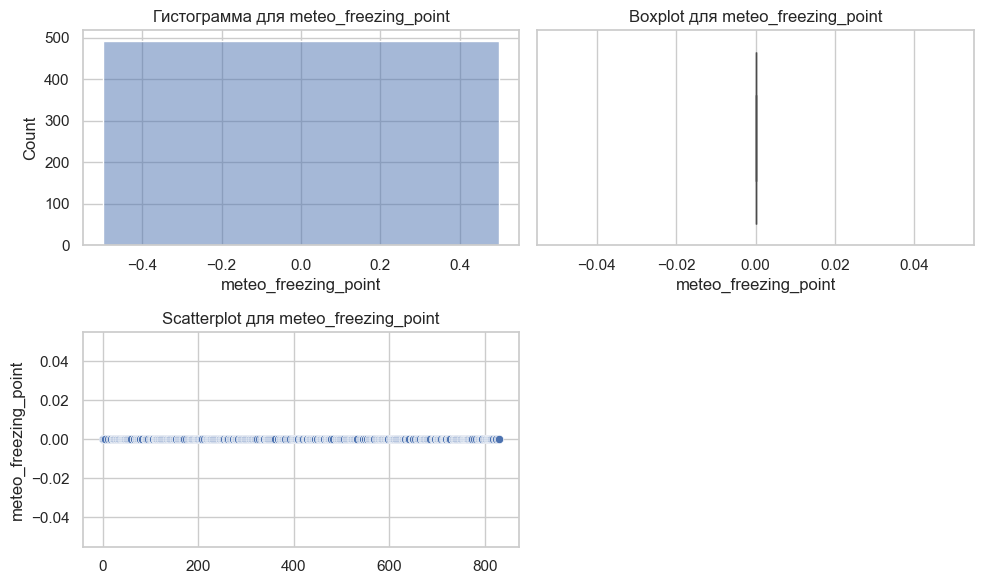

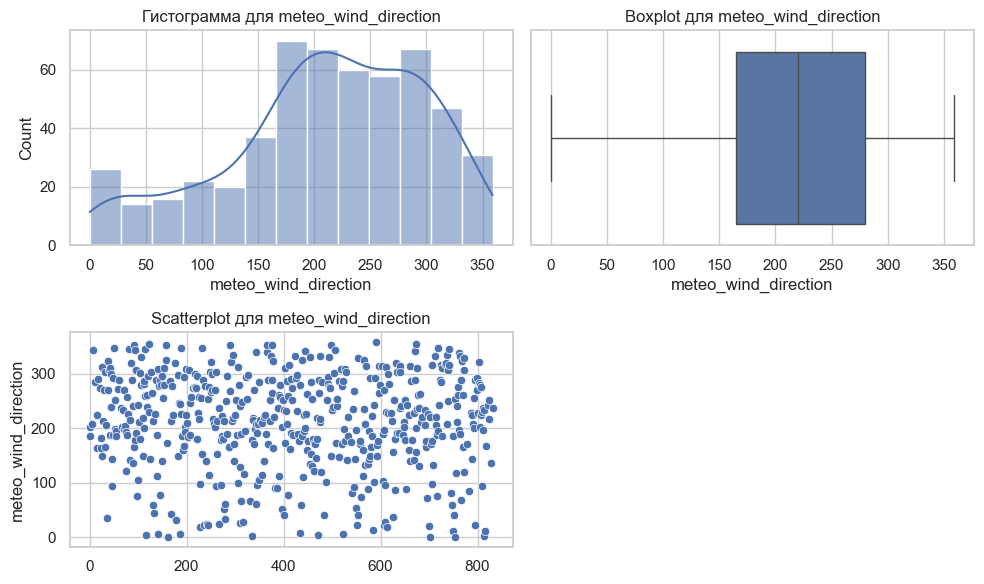

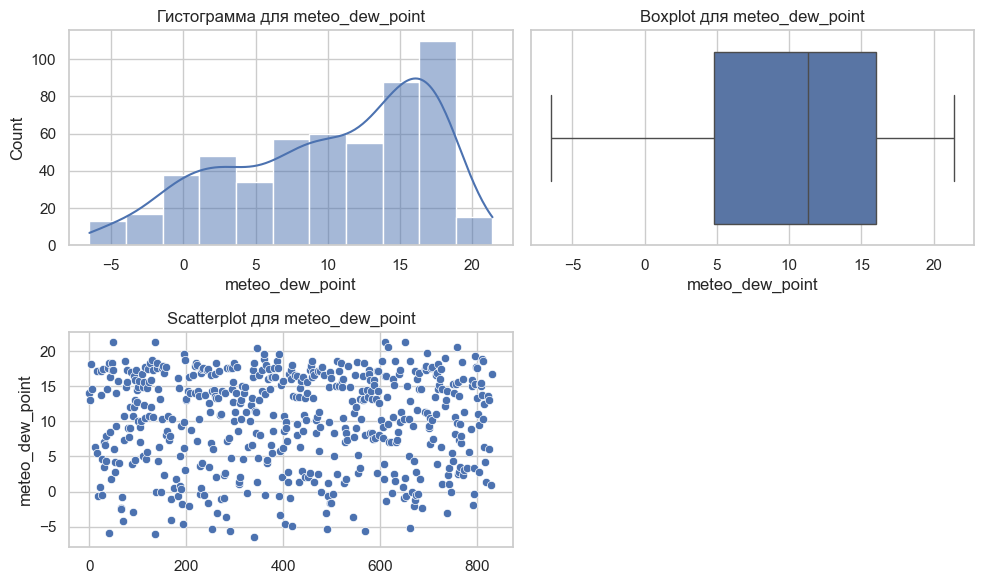

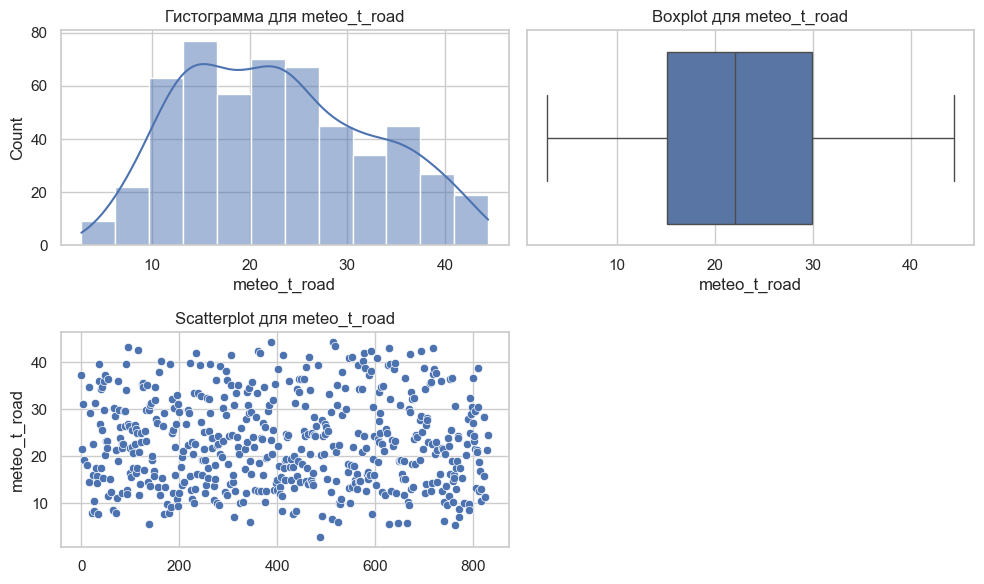

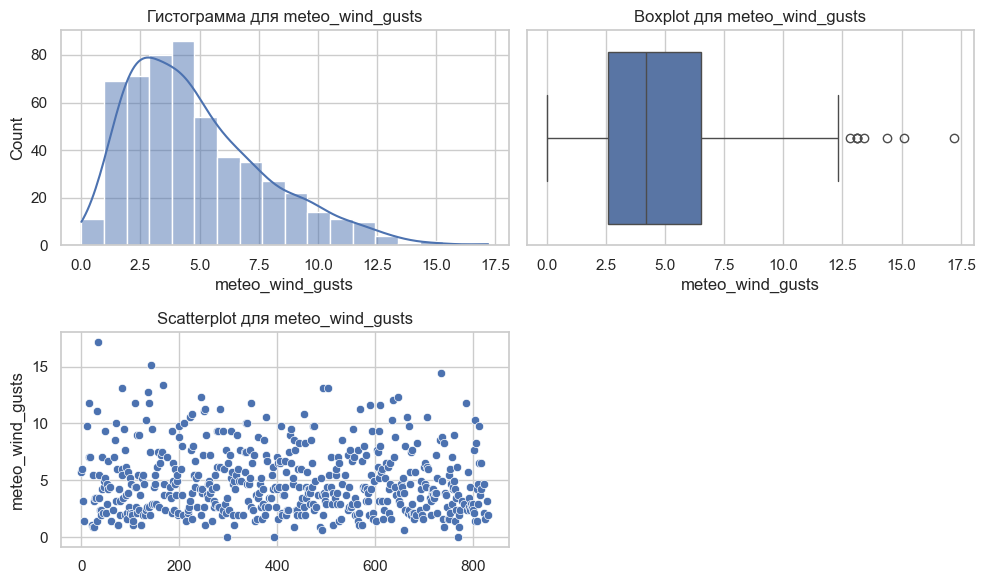

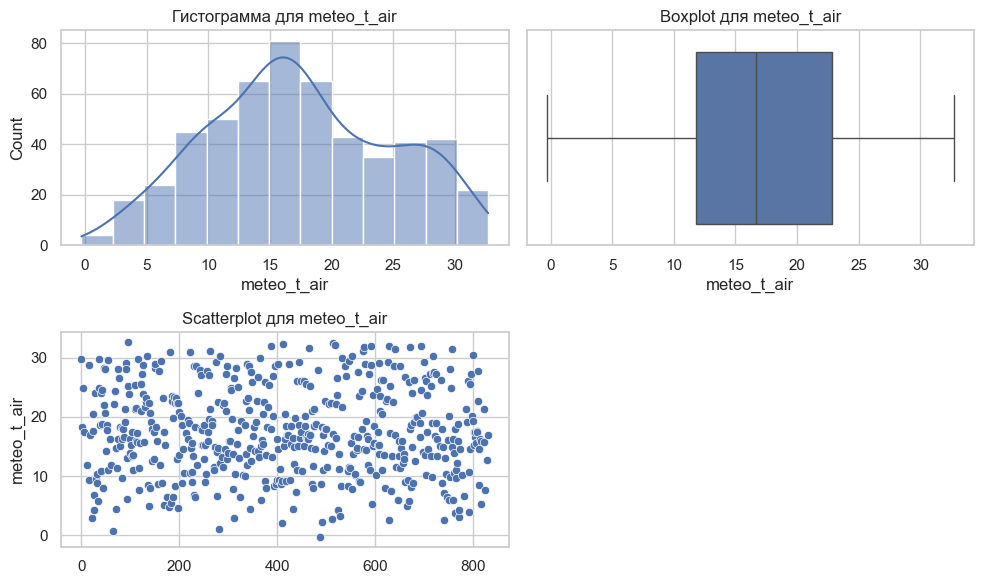

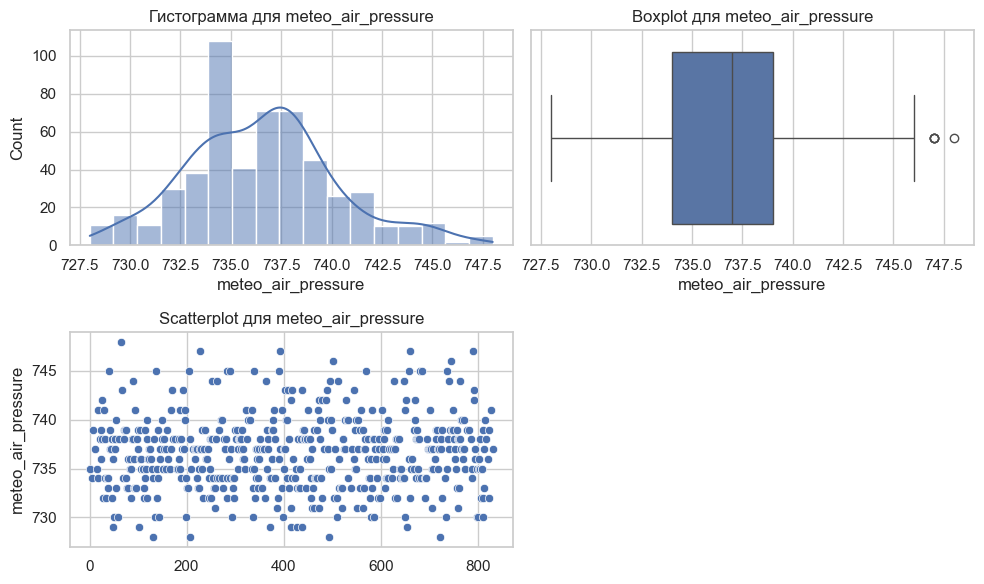

In [11]:
columns_30 = [col for col in station_30928_test.columns if col != 'id']
# Построение графиков
for col in columns_30:
    plt.figure(figsize=(10, 6))
    
    # Гистограмма
    plt.subplot(2, 2, 1)
    sns.histplot (station_30928_test[col], kde=True)
    plt.title(f'Гистограмма для {col}')
    
    # Boxplot
    plt.subplot(2, 2, 2)
    sns.boxplot(x = station_30928_test[col])
    plt.title(f'Boxplot для {col}')
  
    plt.subplot(2, 2, 3)
    sns.scatterplot (station_30928_test[col])
    plt.title(f'Scatterplot для {col}')
    
    plt.tight_layout()
    plt.show()

### Работа со статистикой

Из визуализация хорошо видно некоторые выбросы, а также сломанный датчик t_air у 24445

In [128]:
specific_value_dict = {
    'meteo_layer_type': [5],
    'meteo_cloudiness':[11]
}

def detect_specific_anomalies(series, values_to_flag):
    anomalies = series.isin(values_to_flag)
    return anomalies.astype(int)


def calculate_z_score(series, mean, std):

    return (series - mean) / std

In [129]:
def detect_anomalies(df_train, df_test, threshold=3.0):
    
    anomaly_labels_test = pd.DataFrame(index=df_test.index)
    
    for column in df_train.columns:
        if column not in ['id','configuration_item_id']:

            

            nan_anomalies_test = df_test[column].isna().astype(int)

            df_train[column].fillna(df_train[column].median(), inplace=True)
            df_test[column].fillna(df_test[column].median(), inplace=True)
            
            if column == 'meteo_layer_type':
                values_to_flag = specific_value_dict.get(column, [])
                anomalies_test = detect_specific_anomalies(df_test[column], values_to_flag)
                
            elif column == 'meteo_cloudiness':
                values_to_flag = specific_value_dict.get(column, [])
                anomalies_test = detect_specific_anomalies(df_test[column], values_to_flag)
            else :
                mean = df_train[column].mean()
                std = df_train[column].std()

                
                z_scores = calculate_z_score(df_test[column], mean, std)

            
                anomalies_test = (np.abs(z_scores) > threshold).astype(int)
            
            combined_anomalies_test = np.maximum(nan_anomalies_test, anomalies_test)
            
            
            anomaly_labels_test[column + '_anomaly'] = combined_anomalies_test
    
    return anomaly_labels_test

In [130]:
anomaly_labels_30 = detect_anomalies(station_30928, station_30928_test)

C:\Users\Dell\AppData\Local\Temp\ipykernel_1352\210123648.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[column].fillna(df_train[column].median(), inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_1352\210123648.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[column].fillna(df_test[column].median(), inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_1352\210123648.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

In [131]:
(anomaly_labels_30 ==1).sum()

meteo_layer_type_anomaly        46
meteo_cloudiness_anomaly         0
meteo_wind_velocity_anomaly      4
meteo_humidity_anomaly           0
meteo_t_underroad_anomaly        0
meteo_freezing_point_anomaly    42
meteo_wind_direction_anomaly     0
meteo_dew_point_anomaly          0
meteo_t_road_anomaly             0
meteo_wind_gusts_anomaly         4
meteo_t_air_anomaly              0
meteo_air_pressure_anomaly       0
dtype: int64

In [132]:
anomaly_labels_24 = detect_anomalies(station_24445, station_24445_test)

C:\Users\Dell\AppData\Local\Temp\ipykernel_1352\210123648.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[column].fillna(df_train[column].median(), inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_1352\210123648.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[column].fillna(df_test[column].median(), inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_1352\210123648.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

In [133]:
(anomaly_labels_24==1).sum()

meteo_layer_type_anomaly        3
meteo_cloudiness_anomaly        0
meteo_wind_velocity_anomaly     0
meteo_humidity_anomaly          0
meteo_t_underroad_anomaly       0
meteo_freezing_point_anomaly    1
meteo_wind_direction_anomaly    0
meteo_dew_point_anomaly         0
meteo_t_road_anomaly            0
meteo_wind_gusts_anomaly        2
meteo_t_air_anomaly             0
meteo_air_pressure_anomaly      2
dtype: int64

In [134]:
anomaly_labels_24['meteo_t_air_anomaly'] = 1

In [135]:
anomaly_labels_30

meteo_layer_type_anomaly  meteo_cloudiness_anomaly  \
0                           0                         0   
1                           0                         0   
4                           0                         0   
6                           0                         0   
11                          0                         0   
..                        ...                       ...   
822                         0                         0   
823                         0                         0   
824                         0                         0   
828                         0                         0   
831                         0                         0   

     meteo_wind_velocity_anomaly  meteo_humidity_anomaly  \
0                              0                       0   
1                              0                       0   
4                              0                       0   
6                              0                       0   
11                             0                       0   
..                           ...                     ...   
822                            0                       0   
823                            0                       0   
824                            0                       0   
828                            0                       0   
831                            0                       0   

     meteo_t_underroad_anomaly  meteo_freezing_point_anomaly  \
0                            0                             0   
1                            0                             0   
4                            0                             0   
6                            0                             0   
11                           0                             0   
..                         ...                           ...   
822                          0                             0   
823                          0                             0   
824                          0                             0   
828                          0                             0   
831                          0                             0   

     meteo_wind_direction_anomaly  meteo_dew_point_anomaly  \
0                               0                        0   
1                               0                        0   
4                               0                        0   
6                               0                        0   
11                              0                        0   
..                            ...                      ...   
822                             0                        0   
823                             0                        0   
824                             0                        0   
828                             0                        0   
831                             0                        0   

     meteo_t_road_anomaly  meteo_wind_gusts_anomaly  meteo_t_air_anomaly  \
0                       0                         0                    0   
1                       0                         0                    0   
4                       0                         0                    0   
6                       0                         0                    0   
11                      0                         0                    0   
..                    ...                       ...                  ...   
822                     0                         0                    0   
823                     0                         0                    0   
824                     0                         0                    0   
828                     0                         0                    0   
831                     0                         0                    0   

     meteo_air_pressure_anomaly  
0                             0  
1                             0  
4                             0  
6           

In [136]:
combined_df = pd.concat([anomaly_labels_24, anomaly_labels_30]).sort_index()

In [137]:
target_df_new = pd.concat([df_test[['id','configuration_item_id']], combined_df], axis=1)

In [138]:
target_df_new

id  configuration_item_id  meteo_layer_type_anomaly  \
0    1106                  30928                         0   
1    1321                  30928                         0   
2    2313                  24445                         0   
3    2274                  24445                         0   
4    1432                  30928                         0   
..    ...                    ...                       ...   
827  1900                  24445                         0   
828   647                  30928                         0   
829  2438                  24445                         0   
830  2452                  24445                         0   
831  1628                  30928                         0   

     meteo_cloudiness_anomaly  meteo_wind_velocity_anomaly  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   
..                        ...                          ...   
827                         0                            0   
828                         0                            0   
829                         0                            0   
830                         0                            0   
831                         0                            0   

     meteo_humidity_anomaly  meteo_t_underroad_anomaly  \
0                         0                          0   
1                         0                          0   
2                         0                          0   
3                         0                          0   
4                         0                          0   
..                      ...                        ...   
827                       0                          0   
828                       0                          0   
829                       0                          0   
830                       0                          0   
831                       0                          0   

     meteo_freezing_point_anomaly  meteo_wind_direction_anomaly  \
0                               0                             0   
1                               0                             0   
2                               0                             0   
3                               0                             0   
4                               0                             0   
..                            ...                           ...   
827                             0                             0   
828                             0                             0   
829                             0                             0   
830                             0                             0   
831                             0                             0   

     meteo_dew_point_anomaly  meteo_t_road_anomaly  meteo_wind_gusts_anomaly  \
0                          0                     0                         0   
1                          0                     0                         0   
2                          0                     0                         0   
3                          0                     0                         0   
4                          0                     0                         0   
..                       ...                   ...                       ...   
827                        0                     0                         0   
828                        0                     0                         0   
829                        0                     0                         0   
830                        0                     0                         0   
831                        0                     0                         0   

     meteo_t_air_anomaly  meteo_air_pressure_anomaly  

In [139]:
station_30928_targets= target_df_new[target_df_new['configuration_item_id'] == 30928]
station_24445_targets = target_df_new[target_df_new['configuration_item_id'] == 24445]

In [140]:
station_30928_targets.drop(columns=['configuration_item_id'], inplace=True)
station_24445_targets.drop(columns=['configuration_item_id'], inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_1352\231716290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_30928_targets.drop(columns=['configuration_item_id'], inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_1352\231716290.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_24445_targets.drop(columns=['configuration_item_id'], inplace=True)


### Создание целевых
Мы решили сделать для трейна целевые метки и использовать их

In [141]:


def detect_anomalies(df_train, df_test, threshold=3.0):
    
    anomaly_labels_test = pd.DataFrame(index=df_train.index)
    
    for column in df_train.columns:
        if column not in ['id', 'ts_unix', 'configuration_item_id' ]:

            

            nan_anomalies_test = df_train[column].isna().astype(int)

            df_train[column].fillna(df_train[column].median(), inplace=True)
            df_test[column].fillna(df_test[column].median(), inplace=True)
            
            if column == 'meteo_layer_type':
                values_to_flag = specific_value_dict.get(column, [])
                anomalies_test = detect_specific_anomalies(df_train[column], values_to_flag)
                
            elif column == 'meteo_cloudiness':
                values_to_flag = specific_value_dict.get(column, [])
                anomalies_test = detect_specific_anomalies(df_train[column], values_to_flag)
            else :
                mean = df_train[column].mean()
                std = df_train[column].std()

                
                z_scores = calculate_z_score(df_train[column], mean, std)

                
                anomalies_test = (np.abs(z_scores) > threshold).astype(int)
           
            combined_anomalies_test = np.maximum(nan_anomalies_test, anomalies_test)
            
            
            anomaly_labels_test[column + '_anomaly'] = combined_anomalies_test
    
    return anomaly_labels_test

In [142]:
train_targets_24 = detect_anomalies(station_24445, station_24445_test)

C:\Users\Dell\AppData\Local\Temp\ipykernel_1352\1243047573.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[column].fillna(df_train[column].median(), inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_1352\1243047573.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[column].fillna(df_test[column].median(), inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_1352\1243047573.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

In [143]:
train_targets_30 = detect_anomalies(station_30928, station_30928_test)

C:\Users\Dell\AppData\Local\Temp\ipykernel_1352\1243047573.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[column].fillna(df_train[column].median(), inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_1352\1243047573.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[column].fillna(df_test[column].median(), inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_1352\1243047573.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

In [144]:
train_targets_30[['id', 'configuration_item_id']]=station_30928[['id', 'configuration_item_id']]
train_targets_24[['id', 'configuration_item_id']]=station_24445[['id', 'configuration_item_id']]

In [145]:
combined_df_train_target = pd.concat([train_targets_30, train_targets_24]).sort_index()
combined_df_train_target

meteo_layer_type_anomaly  meteo_cloudiness_anomaly  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   
...                        ...                       ...   
1935                         0                         0   
1936                         0                         0   
1937                         0                         0   
1938                         0                         0   
1939                         0                         0   

      meteo_wind_velocity_anomaly  meteo_humidity_anomaly  \
0                               0                       0   
1                               0                       0   
2                               0                       0   
3                               0                       0   
4                               0                       0   
...                           ...                     ...   
1935                            0                       0   
1936                            0                       0   
1937                            0                       0   
1938                            0                       0   
1939                            0                       0   

      meteo_t_underroad_anomaly  meteo_freezing_point_anomaly  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   
...                         ...                           ...   
1935                          0                             0   
1936                          0                             0   
1937                          0                             0   
1938                          0                             0   
1939                          0                             0   

      meteo_wind_direction_anomaly  meteo_dew_point_anomaly  \
0                                0                        0   
1                                0                        0   
2                                0                        0   
3                                0                        0   
4                                0                        0   
...                            ...                      ...   
1935                             0                        0   
1936                             0                        0   
1937                             0                        0   
1938                             0                        0   
1939                             0                        0   

      meteo_t_road_anomaly  meteo_wind_gusts_anomaly  meteo_t_air_anomaly  \
0                        0                         0                    0   
1                        0                         0                    0   
2                        0                         0                    0   
3                        0                         0                    0   
4                        0                         0                    0   
...                    ...                       ...                  ...   
1935                     0                         0                    0   
1936                     0                         0                    0   
1937                     0                         0                    0   
1938                     0                         0                    0   
1939                     0                         0                    0   

      meteo_air_pressure_anomaly    id  configuration_item_id  
0                        

### Машинное обучение

In [146]:
from sklearn.ensemble import IsolationForest
numeric_columns = [col for col in station_24445.select_dtypes(include=[float, int]).columns if col not in ['id', 'configuration_item_id']]

def detect_anomalys(df_train, df_test, numeric_columns):
    
    
    df_train.fillna(df_train.median(), inplace=True)
    df_test.fillna(df_test.median(), inplace=True)

    
    scaler = StandardScaler()
    df_train[numeric_columns] = scaler.fit_transform(df_train[numeric_columns])
    df_test[numeric_columns] = scaler.transform(df_test[numeric_columns])

    anomalies_train = pd.DataFrame(index=df_train.index)
    anomalies_test = pd.DataFrame(index=df_test.index)

    features = [col for col in df_train.columns if col not in ['id', 'configuration_item_id']]

    for feature in features:
        
        nan_anomalies_train = df_train[feature].isna().astype(int)
        nan_anomalies_test = df_test[feature].isna().astype(int)
        
        
        iso_forest = IsolationForest(contamination=0.01)
        iso_forest.fit(df_train[[feature]])
        
        isolation_anomalies_train = (iso_forest.predict(df_train[[feature]]) == -1).astype(int)
   
        isolation_anomalies_test = (iso_forest.predict(df_test[[feature]]) == -1).astype(int)
        
        anomalies_train[feature + '_anomaly'] = np.maximum(nan_anomalies_train, isolation_anomalies_train)
        anomalies_test[feature + '_anomaly'] = np.maximum(nan_anomalies_test, isolation_anomalies_test)

    return anomalies_train, anomalies_test

In [147]:
anomaly_train, anomaly_test = detect_anomalys(station_24445, station_24445_test, numeric_columns)

C:\Users\Dell\AppData\Local\Temp\ipykernel_1352\252176266.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.fillna(df_train.median(), inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_1352\252176266.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.fillna(df_test.median(), inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_1352\252176266.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [148]:
anomaly_train_2, anomaly_test_2 = detect_anomalys(station_30928, station_30928_test, numeric_columns)

C:\Users\Dell\AppData\Local\Temp\ipykernel_1352\252176266.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.fillna(df_train.median(), inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_1352\252176266.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.fillna(df_test.median(), inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_1352\252176266.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [149]:
X_train_24 = pd.concat([station_24445, anomaly_train], axis=1)
X_test_24 = pd.concat([station_24445_test, anomaly_test], axis=1)

In [150]:
combined_df_train_target.insert(0, 'id', combined_df_train_target.pop('id'))

In [151]:
current_columns = combined_df_train_target.columns.tolist()
current_columns_without_id = [col for col in current_columns if col not in ['id', 'configuration_item_id']]
new_columns = [f'target_{i+1}' for i in range(len(current_columns_without_id))]


new_column_names = dict(zip(current_columns_without_id, new_columns))


y_train = combined_df_train_target.rename(columns=new_column_names)

In [152]:
y_train_30 = y_train[y_train['configuration_item_id'] == 30928]
y_train_24= y_train[y_train['configuration_item_id'] == 24445]

In [153]:
y_train_30.drop(columns=['configuration_item_id'], inplace=True)
y_train_24.drop(columns=['configuration_item_id'], inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_1352\2373310796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train_30.drop(columns=['configuration_item_id'], inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_1352\2373310796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train_24.drop(columns=['configuration_item_id'], inplace=True)


In [154]:
from sklearn.ensemble import RandomForestClassifier

for i in range(1, 13):
    feature_col = numeric_columns[i-1]  
    anomaly_col = feature_col + '_anomaly'  
    
    target_col = f'target_{i}'
    if target_col in y_train_24.columns:
        y_train_24_new = y_train_24[target_col]
        
        X_train_feature = X_train_24[[feature_col, anomaly_col]]
        X_test_feature = X_test_24[[feature_col, anomaly_col]]

        model = RandomForestClassifier()
        model.fit(X_train_feature, y_train_24_new)
        
        station_24445_targets[f'{target_col}_predicted'] = model.predict(X_test_feature)

C:\Users\Dell\AppData\Local\Temp\ipykernel_1352\2635137090.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_24445_targets[f'{target_col}_predicted'] = model.predict(X_test_feature)
C:\Users\Dell\AppData\Local\Temp\ipykernel_1352\2635137090.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_24445_targets[f'{target_col}_predicted'] = model.predict(X_test_feature)
C:\Users\Dell\AppData\Local\Temp\ipykernel_1352\2635137090.py:17: SettingWithCopyWarning: 
A value is trying to be set on a co

In [155]:
X_train_30 = pd.concat([station_30928, anomaly_train_2], axis=1)
X_test_30 = pd.concat([station_30928_test, anomaly_test_2], axis=1)

In [156]:
for i in range(1, 13):
    feature_col = numeric_columns[i-1]  
    anomaly_col = feature_col + '_anomaly'  
    
    target_col = f'target_{i}'
    if target_col in y_train_30.columns:
        y_train_30_new = y_train_30[target_col]
        
        X_train_feature_2 = X_train_30[[feature_col, anomaly_col]]
        X_test_feature_2 = X_test_30[[feature_col, anomaly_col]]

        model = RandomForestClassifier()
        model.fit(X_train_feature_2, y_train_30_new)
        
        station_30928_targets[f'{target_col}_predicted'] = model.predict(X_test_feature_2)

C:\Users\Dell\AppData\Local\Temp\ipykernel_1352\3438018892.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_30928_targets[f'{target_col}_predicted'] = model.predict(X_test_feature_2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_1352\3438018892.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_30928_targets[f'{target_col}_predicted'] = model.predict(X_test_feature_2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_1352\3438018892.py:15: SettingWithCopyWarning: 
A value is trying to be set on 

In [157]:
station_30928_targets = station_30928_targets.loc[:, ~station_30928_targets.columns.duplicated()]


rename_mapping = {}
for i, col in enumerate(station_30928_targets.columns[1:13], start=1):
    new_name = f'target_{i}'
    rename_mapping[col] = new_name

station_30928_targets.rename(columns=rename_mapping, inplace=True)

In [160]:
station_30928_targets.columns

Index(['id', 'target_1', 'target_2', 'target_3', 'target_4', 'target_5',
       'target_6', 'target_7', 'target_8', 'target_9', 'target_10',
       'target_11', 'target_12', 'target_1_predicted', 'target_2_predicted',
       'target_3_predicted', 'target_4_predicted', 'target_5_predicted',
       'target_6_predicted', 'target_7_predicted', 'target_8_predicted',
       'target_9_predicted', 'target_10_predicted', 'target_11_predicted',
       'target_12_predicted'],
      dtype='object')

In [161]:
target_columns = [f'target_{i}' for i in range(1, 13)]

result_df_309 = station_30928_targets.copy()


for col in target_columns:
    col_predicted = f'{col}_predicted'
    
   
    result_df_309[col] = station_30928_targets.apply(lambda row: row[col] if row[col] > row[col_predicted] else row[col_predicted], axis=1)


predicted_columns = [f'{col}_predicted' for col in target_columns]
result_df_309 = result_df_309.drop(columns=predicted_columns)

In [162]:
station_24445_targets = station_24445_targets.loc[:, ~station_24445_targets.columns.duplicated()]


rename_mapping = {}
for i, col in enumerate(station_24445_targets.columns[1:13], start=1):
    new_name = f'target_{i}'
    rename_mapping[col] = new_name

station_24445_targets.rename(columns=rename_mapping, inplace=True)

In [163]:
target_columns = [f'target_{i}' for i in range(1, 13)]

result_df_244 = station_24445_targets.copy()


for col in target_columns:
    col_predicted = f'{col}_predicted'
    
   
    result_df_244[col] = station_24445_targets.apply(lambda row: row[col] if row[col] > row[col_predicted] else row[col_predicted], axis=1)

predicted_columns = [f'{col}_predicted' for col in target_columns]
result_df_244 = result_df_244.drop(columns=predicted_columns)

In [167]:
combined_df = pd.concat([result_df_309, result_df_244]).sort_index()
combined_df

id  target_1  target_2  target_3  target_4  target_5  target_6  \
0    1106         0         0         0         0         0         0   
1    1321         0         0         0         0         0         0   
2    2313         0         0         0         0         0         0   
3    2274         0         0         0         0         0         0   
4    1432         0         0         0         0         0         0   
..    ...       ...       ...       ...       ...       ...       ...   
827  1900         0         0         0         0         0         0   
828   647         0         0         0         0         0         0   
829  2438         0         0         0         0         0         0   
830  2452         0         0         0         0         0         0   
831  1628         0         0         0         0         0         0   

     target_7  target_8  target_9  target_10  target_11  target_12  
0           0         0         0          0          0          0  
1           0         0         0          0          0          0  
2           0         0         0          0          1          0  
3           0         0         0          0          1          0  
4           0         0         0          0          0          0  
..        ...       ...       ...        ...        ...        ...  
827         0         0         0          0          1          0  
828         0         0         0          0          0          0  
829         0         0         0          0          1          0  
830         0         0         0          0          1          0  
831         0         0         0          0          0          0  

[832 rows x 13 columns]

In [168]:
combined_df_22 = combined_df[['id'] + [col for col in combined_df.columns if col != 'id']]



combined_df_22['target'] = combined_df_22.apply(lambda row: '[' + ', '.join(map(str, row[1:])) + ']', axis=1)

final_result_test_2 = combined_df_22[['id', 'target']]
final_result_test_2

id                                target
0    1106  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1    1321  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2    2313  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
3    2274  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
4    1432  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
..    ...                                   ...
827  1900  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
828   647  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
829  2438  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
830  2452  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
831  1628  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

[832 rows x 2 columns]

In [169]:
final_result_test_2.to_csv('final_submission_next.csv', index=False)